In [1]:
#All imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
#read data from the loan.csv
original_df = pd.read_csv('loan.csv')

C:\Users\anush\AppData\Local\Temp\ipykernel_28840\3600036665.py:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('loan.csv')


In [3]:
#print observations and variable counts with all data
original_df.shape

(39717, 48)

From above code we can see our original data set contain 39717 rows and 48 columns

In [4]:
# List of statuses indicating default. Here Charged Off is the status name for default loan.
default_statuses = ['Charged Off']

In [5]:
# Filter the dataset to include only defaulted loans
df = original_df[original_df['loan_status'].isin(default_statuses)]

In [6]:
#print observations and variable counts after filtering
df.shape

(5627, 48)

After removing all irrelevant data which is not equivalent to Charged Off, we got 5627 rows and 48 columns.

In [7]:
#Getting catagorical and numerical variables by seeing the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5627 non-null   int64  
 1   member_id                5627 non-null   int64  
 2   loan_amnt                5627 non-null   int64  
 3   funded_amnt              5627 non-null   int64  
 4   funded_amnt_inv          5627 non-null   float64
 5   term                     5627 non-null   object 
 6   int_rate                 5627 non-null   object 
 7   installment              5627 non-null   float64
 8   grade                    5627 non-null   object 
 9   sub_grade                5627 non-null   object 
 10  emp_title                5143 non-null   object 
 11  emp_length               5399 non-null   object 
 12  home_ownership           5627 non-null   object 
 13  annual_inc               5627 non-null   float64
 14  verification_status      562

In [8]:
#check unique values in each column
df.nunique()

id                         5627
member_id                  5627
loan_amnt                   487
funded_amnt                 618
funded_amnt_inv            2008
term                          2
int_rate                    332
installment                4317
grade                         7
sub_grade                    35
emp_title                  4636
emp_length                   11
home_ownership                4
annual_inc                 1253
verification_status           3
issue_d                      53
loan_status                   1
url                        5627
desc                       3797
purpose                      14
title                      3249
zip_code                    666
addr_state                   47
dti                        2219
delinq_2yrs                   9
earliest_cr_line            421
inq_last_6mths                9
mths_since_last_delinq       86
mths_since_last_record       88
open_acc                     34
pub_rec                       3
revol_ba

In [9]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_28840\3238561367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [10]:
#print observations and variable counts after dropping the duplicate value.
df.shape

(5627, 48)

By printing the df.shape we can conclude that there is no duplicate value present in the given data set

In [11]:
#dropping the irrelevant columns for analysis, e.g: 'id','member_id','url','desc','title'
df=df.drop(['id','member_id','url','desc','title'],axis=1)

In [12]:
# Remove underscores from the 'purpose' column and replace them with spaces
df['purpose'] = df['purpose'].str.replace('_', '')

In [13]:
#print observations and variable counts after dropping the irrelevant columns
df.shape

(5627, 43)

After dropping all irrelevant columns we have 43 columns now.

In [14]:
#Identify missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

emp_title                  484
emp_length                 228
mths_since_last_delinq    3485
mths_since_last_record    5049
revol_util                  16
last_pymnt_d                71
next_pymnt_d              5627
last_credit_pull_d           1
pub_rec_bankruptcies       118
dtype: int64


The following columns contain null values - emp_title, emp_length, mths_since_last_delinq, mths_since_last_record,revol_util,
last_pymnt_d,next_pymnt_d, last_credit_pull_d, pub_rec_bankruptcies

In [15]:
# Print column names to verify
print("Original column names:")
print(df.columns.tolist())

# Strip white spaces and hidden characters from column names
df.columns = df.columns.str.strip()

# Print cleaned column names to verify
print("Cleaned column names:")
print(df.columns.tolist())

Original column names:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']
Cleaned column names:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs'

In [16]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

In [17]:
#print observations and variable counts after dropping columns with more than 50% missing values
df.shape

(5627, 40)

Now we have 40 columns after dropping columns with more than 50% missing values

In [18]:
#Impute missing values for remaining columns
# For numerical columns, we use median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_cols:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

In [19]:
#Impute missing values for remaining columns
# For categorical columns, we use mode
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
#converting term column in numeric data
df['term'] = df['term'].apply(lambda x: int(x.strip().split()[0]))

In [21]:
#'int_rate' and 'revol_util' are treated as strings first, then remove '%' and convert to float
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [22]:
#check if the above 3 columns converted in to numeric data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                5627 non-null   int64  
 1   funded_amnt              5627 non-null   int64  
 2   funded_amnt_inv          5627 non-null   float64
 3   term                     5627 non-null   int64  
 4   int_rate                 5627 non-null   float64
 5   installment              5627 non-null   float64
 6   grade                    5627 non-null   object 
 7   sub_grade                5627 non-null   object 
 8   emp_title                5627 non-null   object 
 9   emp_length               5627 non-null   object 
 10  home_ownership           5627 non-null   object 
 11  annual_inc               5627 non-null   float64
 12  verification_status      5627 non-null   object 
 13  issue_d                  5627 non-null   object 
 14  loan_status              562

In [23]:
df.shape

(5627, 40)

In [24]:
# Verify that missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_la

Now all missing values are handled.

In [25]:
#Creating new features that might help in predicting defaults.
df['loan_income_ratio'] = df['loan_amnt'] / df['annual_inc']

In [26]:
#statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,5627.0,12104.385108,8085.732038,900.000000,5600.000000,10000.000000,16500.000,3.500000e+04
funded_amnt,5627.0,11753.398792,7760.516335,900.000000,5575.000000,10000.000000,16000.000,3.500000e+04
funded_amnt_inv,5627.0,10864.521324,7661.750540,0.000000,5000.000000,9401.209477,15000.000,3.500000e+04
term,5627.0,46.236360,11.870746,36.000000,36.000000,36.000000,60.000,6.000000e+01
int_rate,5627.0,13.820432,3.654413,5.420000,11.310000,13.610000,16.400,2.440000e+01
installment,5627.0,336.175006,217.051841,22.790000,168.555000,293.870000,457.840,1.305190e+03
annual_inc,5627.0,62427.298034,47776.014188,4080.000000,37000.000000,53000.000000,75000.000,1.250000e+06
dti,5627.0,14.000624,6.585577,0.000000,9.050000,14.290000,19.290,2.985000e+01
delinq_2yrs,5627.0,0.170606,0.534986,0.000000,0.000000,0.000000,0.000,8.000000e+00
inq_last_6mths,5627.0,1.058113,1.154136,0.000000,0.000000,1.000000,2.000,8.000000e+00


In [27]:
# Function to clean emp_title
def clean_emp_title(title):
    title = title.lower()  # Convert to lowercase
    title = re.sub(r'[^a-zA-Z\s]', '', title)  # Remove special characters, keeping only letters and spaces
    title = re.sub(r'\b\d+\b', '', title)  # Remove standalone digits
    title = re.sub(r'\s+', ' ', title)  # Replace multiple spaces with a single space
    title = title.strip()  # Remove leading and trailing whitespace
    return title

# Apply the cleaning function to the emp_title column in place
df['emp_title'] = df['emp_title'].apply(clean_emp_title)

# Display the cleaned titles
print(df['emp_title'])

# Check for any remaining special characters
special_characters = df['emp_title'].apply(lambda x: bool(re.search(r'[^a-zA-Z\s]', x)))
print("Rows with special characters:", df[special_characters])

# Check for any remaining standalone digits
standalone_digits = df['emp_title'].apply(lambda x: bool(re.search(r'\b\d+\b', x)))
print("Rows with standalone digits:", df[standalone_digits])

# Check for any leading/trailing whitespace
leading_trailing_whitespace = df['emp_title'].apply(lambda x: x != x.strip())
print("Rows with leading/trailing whitespace:", df[leading_trailing_whitespace])

# Check for any empty or null values
empty_or_null = df['emp_title'].apply(lambda x: x == '' or pd.isnull(x))
print("Rows with empty or null values:", df[empty_or_null])

# If none of the checks above print any rows, the cleaning is successful
if df[special_characters].empty and df[standalone_digits].empty and df[leading_trailing_whitespace].empty and df[empty_or_null].empty:
    print("All data cleaned successfully!")
else:
    print("Some data still need cleaning.")

1                                    ryder
8                          bank of america
9                                starbucks
12       va dept of conservationrecreation
14                                   sfmta
                       ...                
39667        nebraska occupational therapy
39668                        amz marketing
39669                universal advertising
39678              invision power services
39688                 auto motors of miami
Name: emp_title, Length: 5627, dtype: object
Rows with special characters: Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, 

#From the above output we can observe that some data still need cleaning.

In [28]:
# Fill empty or null values in emp_title with 'unknown'
df['emp_title'] = df['emp_title'].apply(lambda x: 'unknown' if x == '' or pd.isnull(x) else x)

# Verify that no empty or null values remain
empty_or_null = df['emp_title'].apply(lambda x: x == '' or pd.isnull(x))
print("Rows with empty or null values after filling:", df[empty_or_null])

# If the DataFrame is empty, it means there are no more empty or null values
if df[empty_or_null].empty:
    print("All data cleaned successfully!")
else:
    print("Some data still need cleaning.")


Rows with empty or null values after filling: Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies, loan_income_ratio]
Index: []

[0 rows x 41 columns]
All data cleaned successfully!


#Now all data are cleaned for emp_title column

In [29]:
#separate numerical and categorical variables
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Identify numrical columns
numrical_cols = df.select_dtypes(include=['int64','float64']).columns
print('categorical_cols',categorical_cols)
print('numrical_cols',numrical_cols)

categorical_cols Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')
numrical_cols Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'loan_income_ratio'],
      dtype='object')


loan_amnt
Skew : 0.92


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


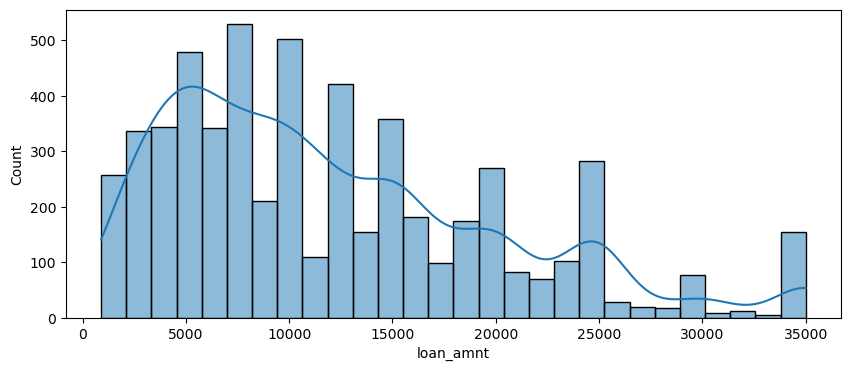

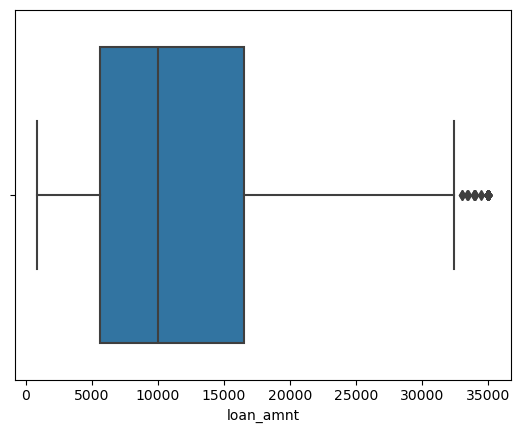

funded_amnt
Skew : 0.95


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


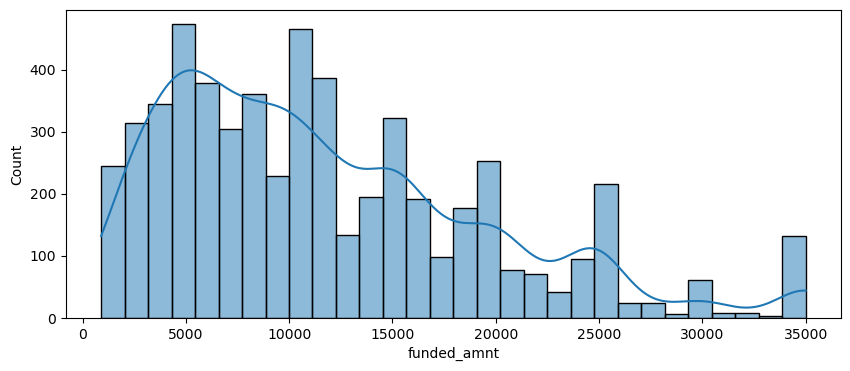

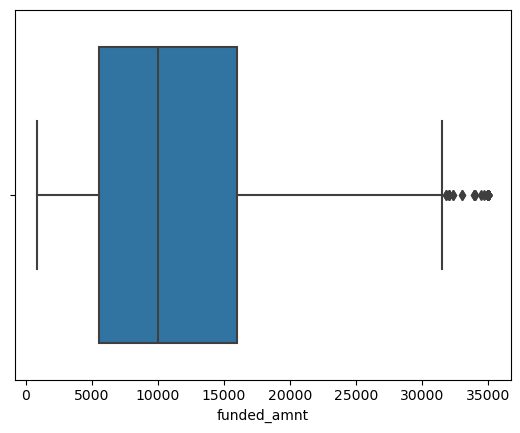

funded_amnt_inv
Skew : 1.02


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


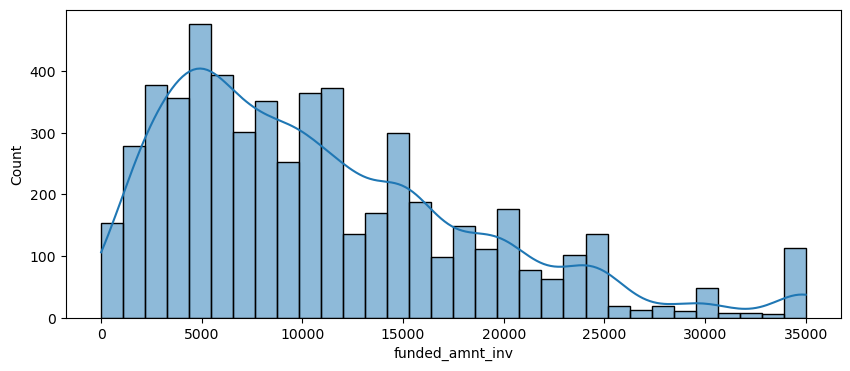

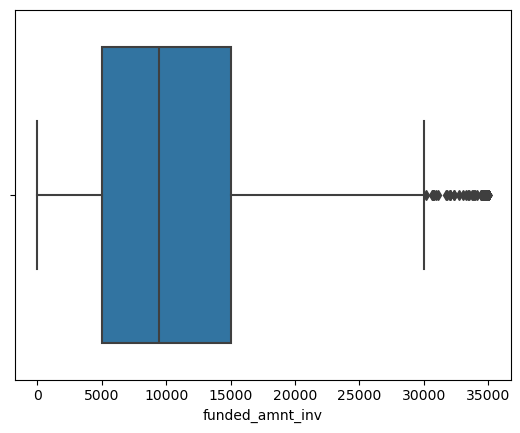

term
Skew : 0.3


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


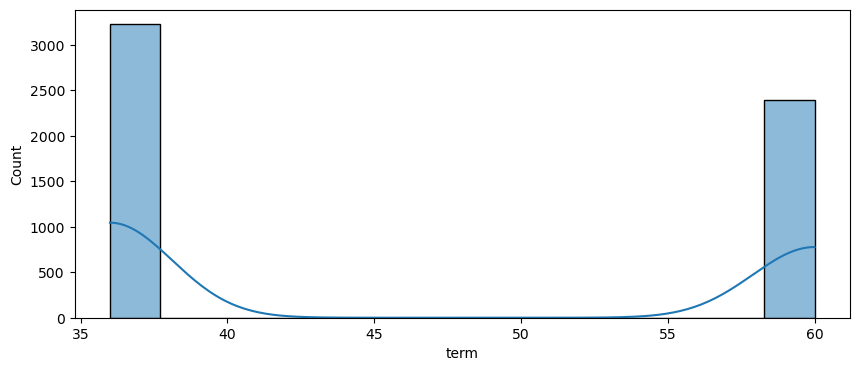

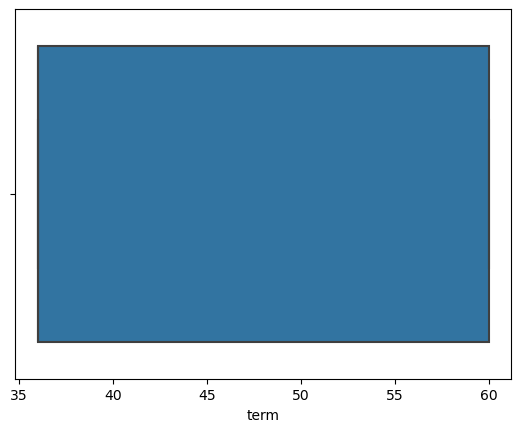

int_rate
Skew : 0.09


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


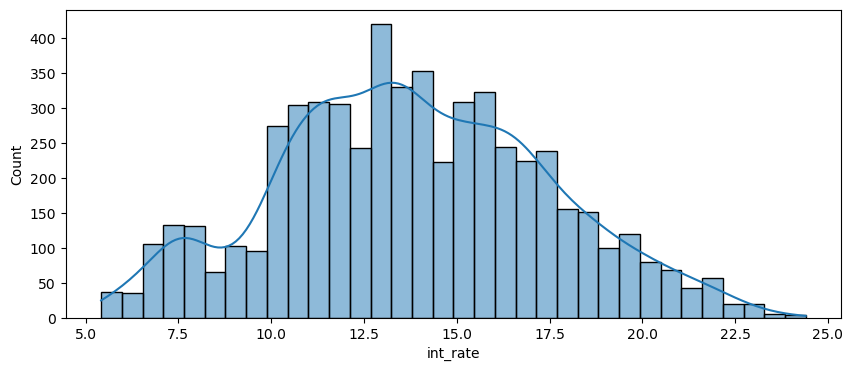

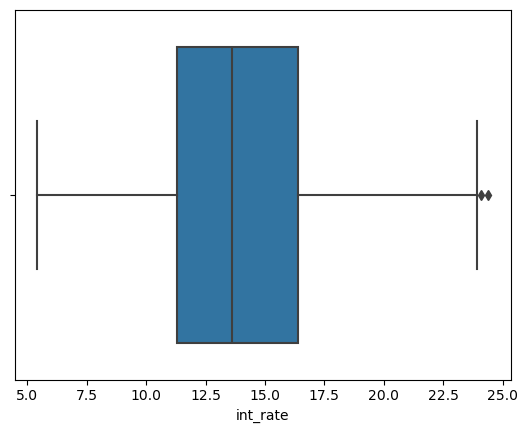

installment
Skew : 1.02


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


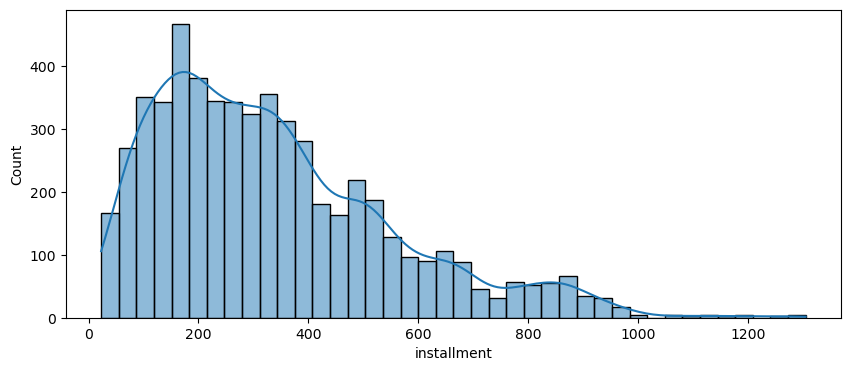

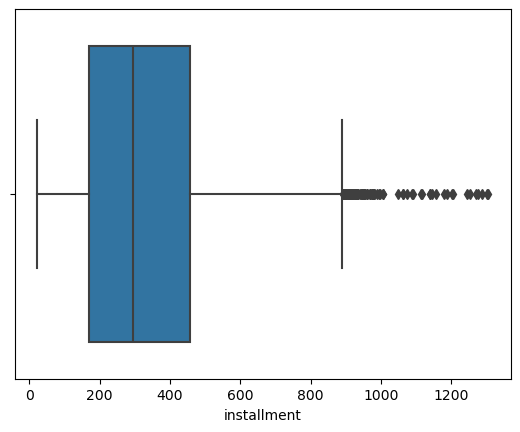

annual_inc
Skew : 7.54


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


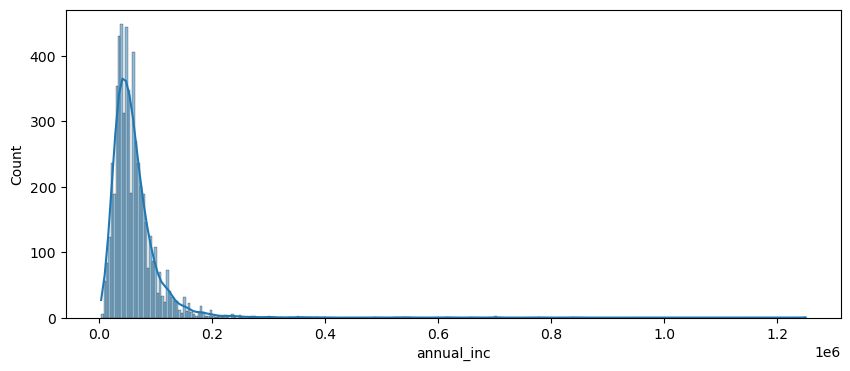

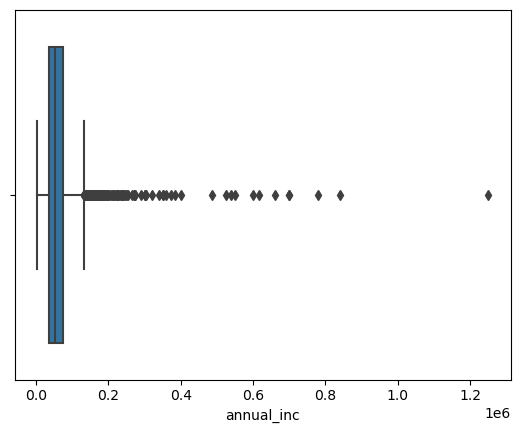

dti
Skew : -0.17


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


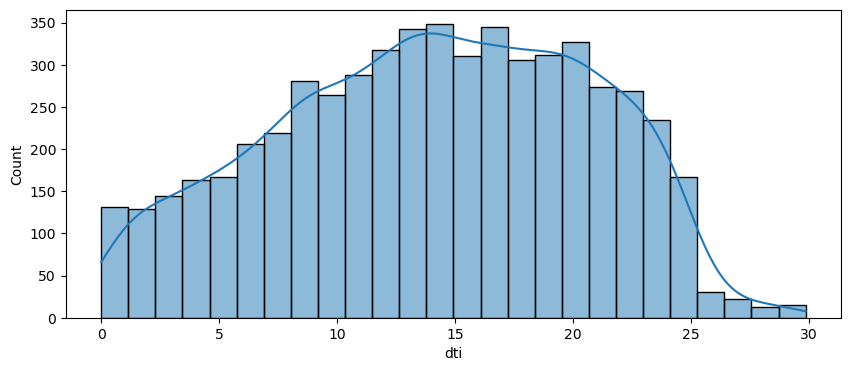

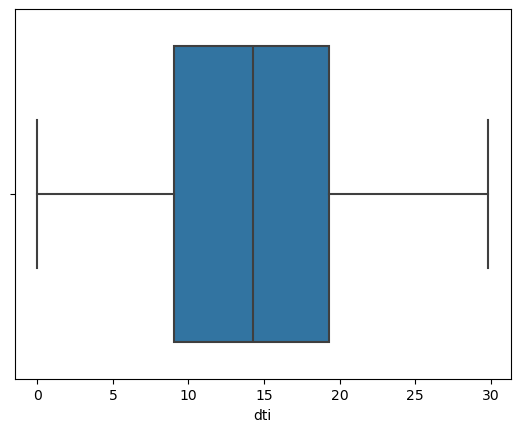

delinq_2yrs
Skew : 4.55


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


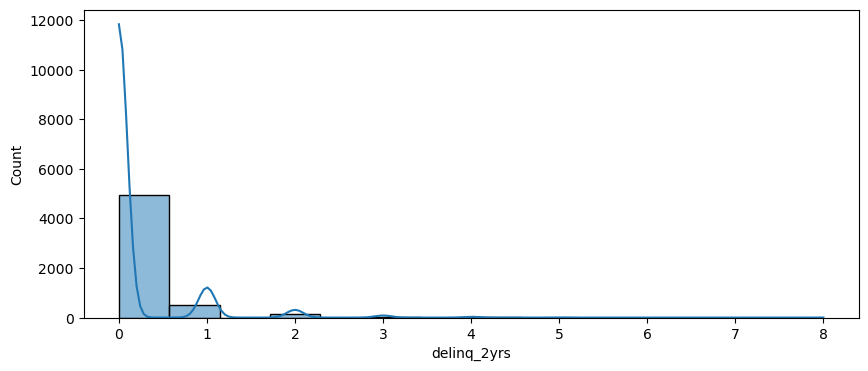

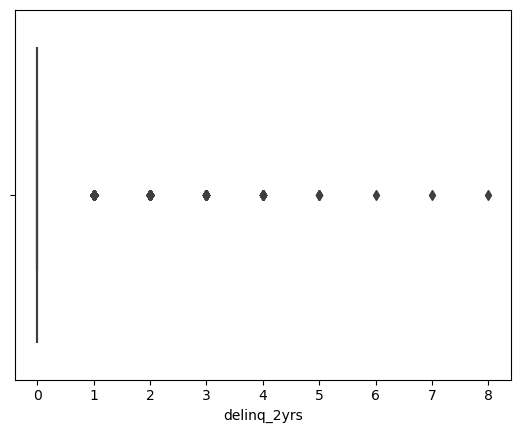

inq_last_6mths
Skew : 1.23


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


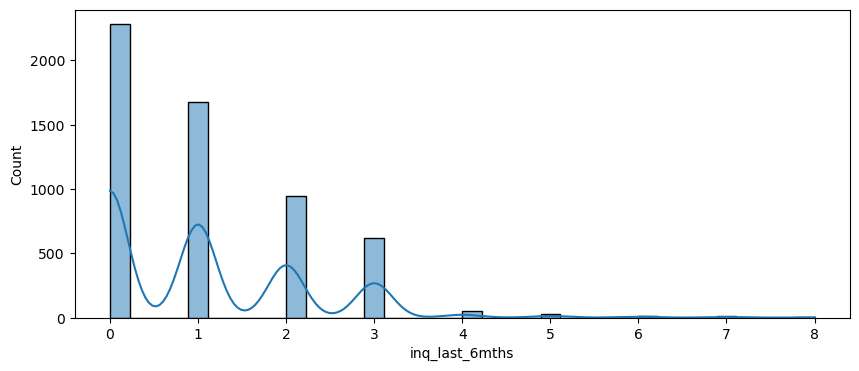

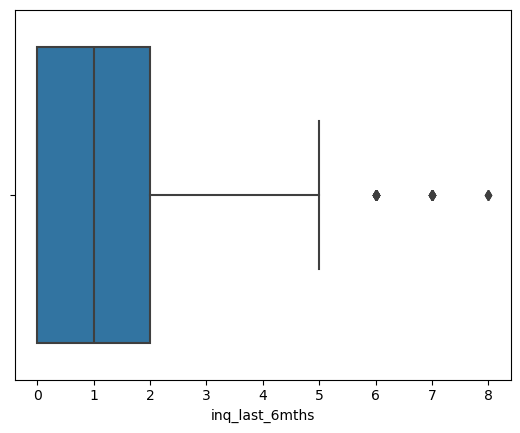

open_acc
Skew : 1.07


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


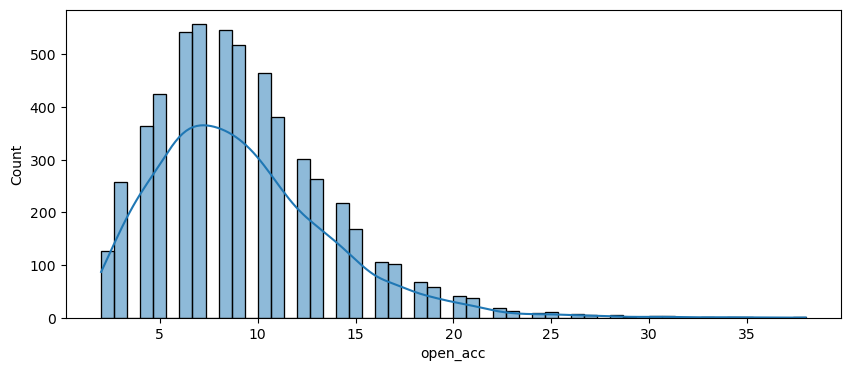

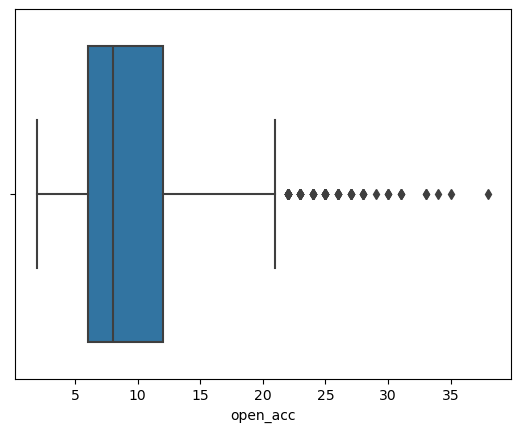

pub_rec
Skew : 3.21


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


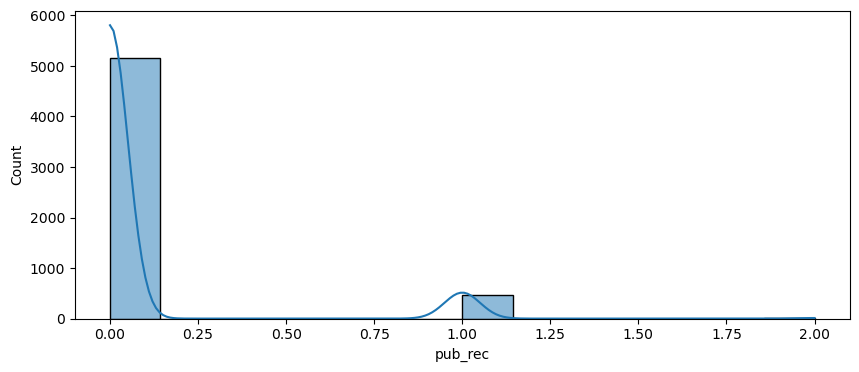

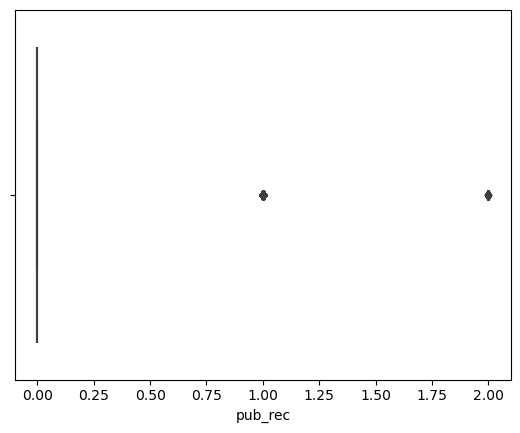

revol_bal
Skew : 2.98


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


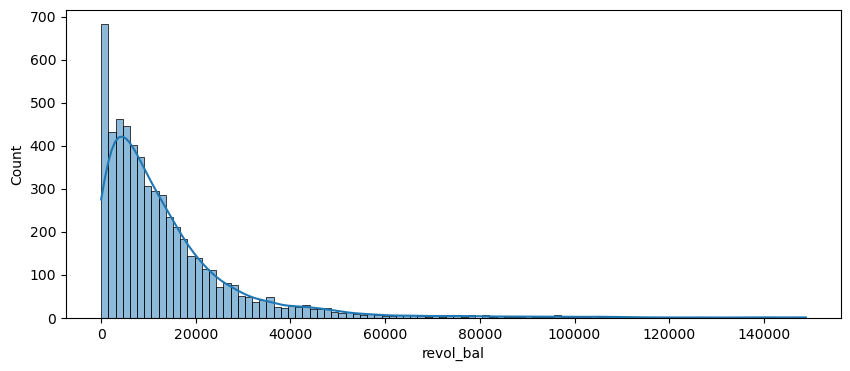

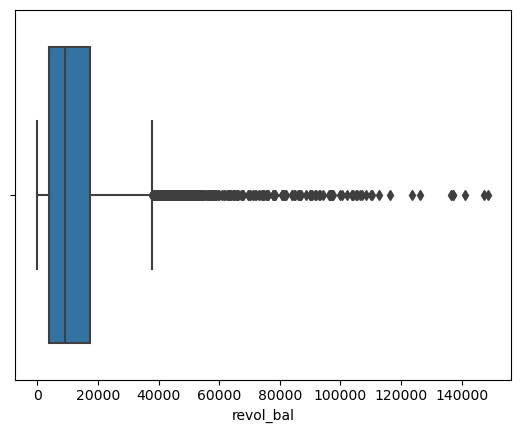

revol_util
Skew : -0.32


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


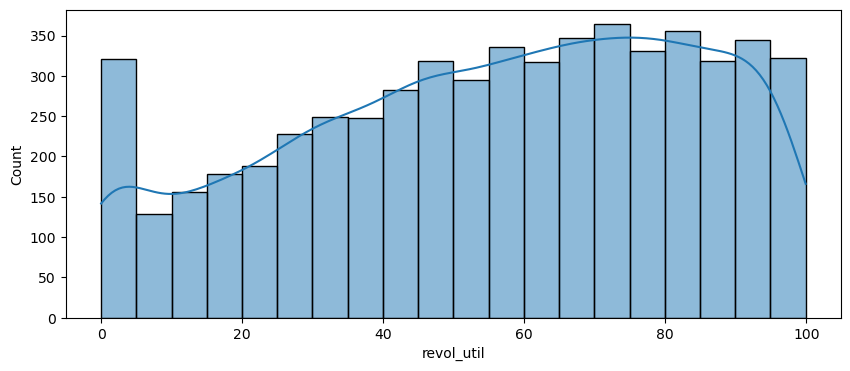

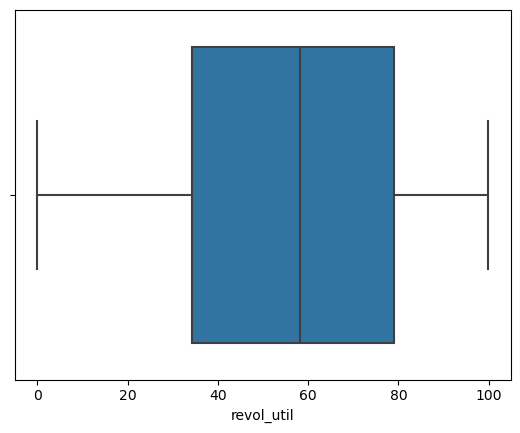

total_acc
Skew : 0.81


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


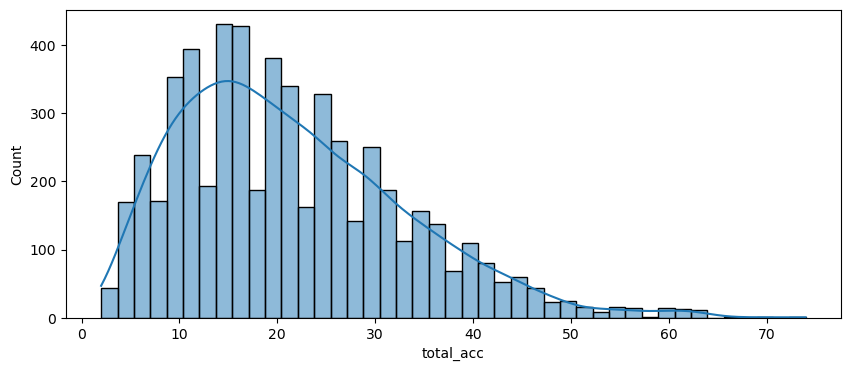

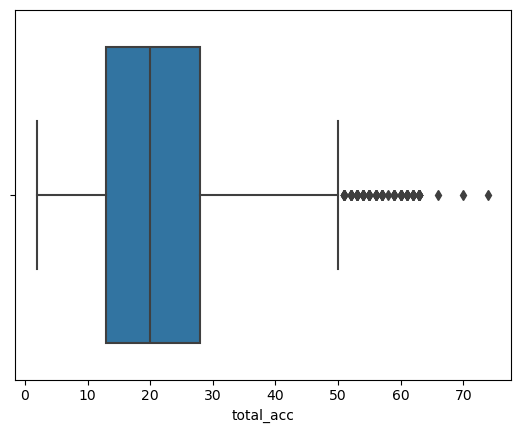

out_prncp
Skew : 0.0


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


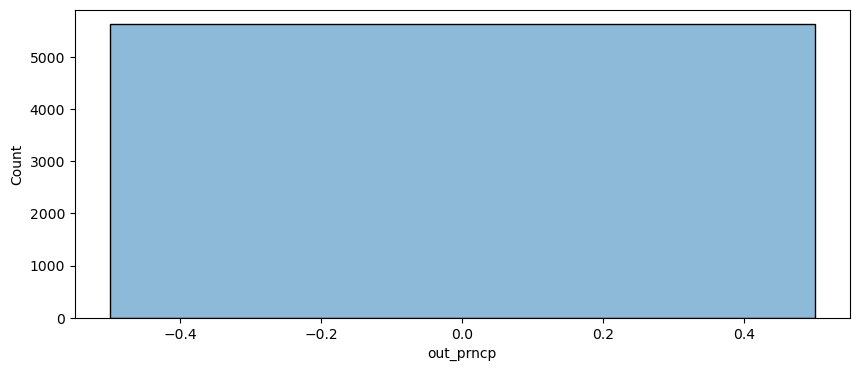

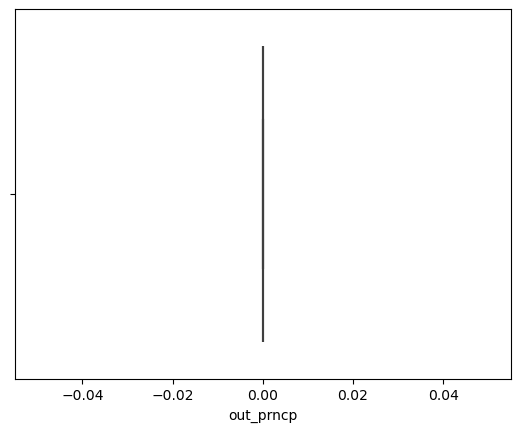

out_prncp_inv
Skew : 0.0


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


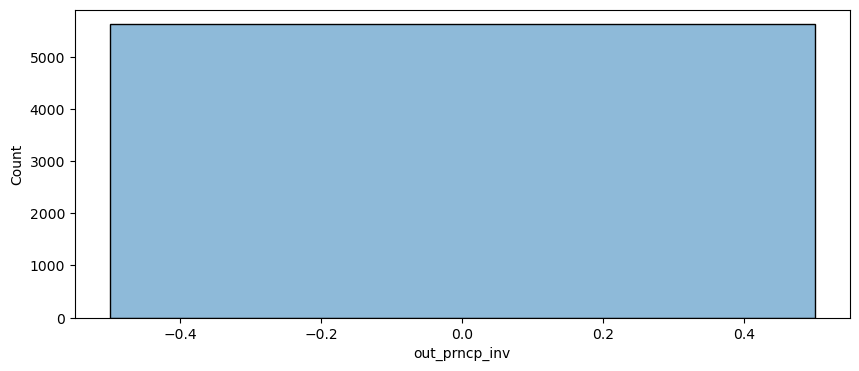

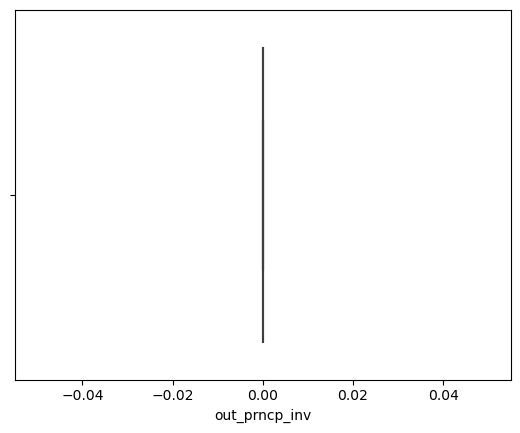

total_pymnt
Skew : 1.95


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


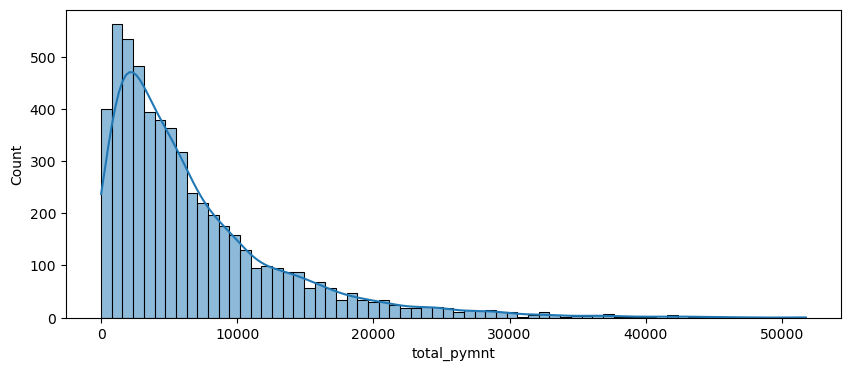

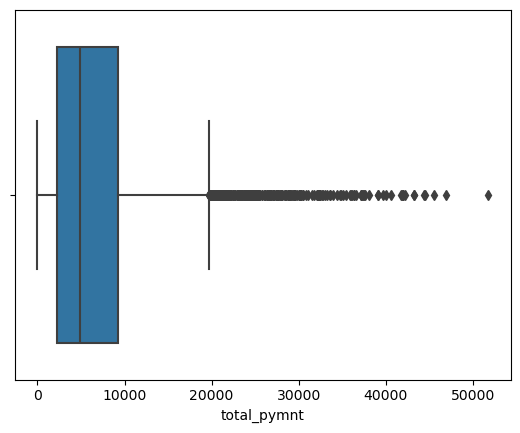

total_pymnt_inv
Skew : 2.03


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


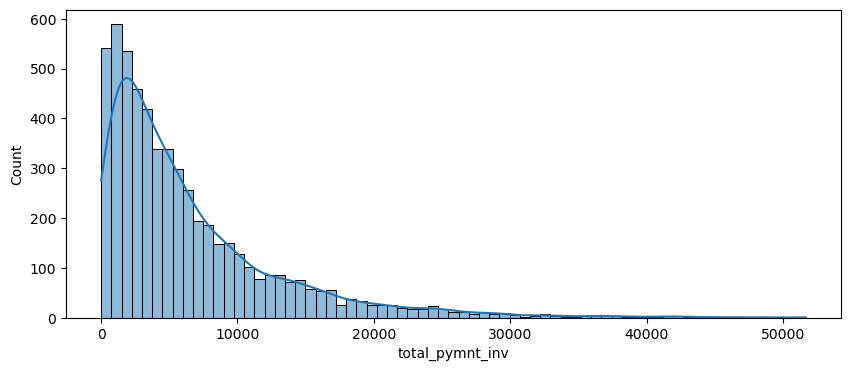

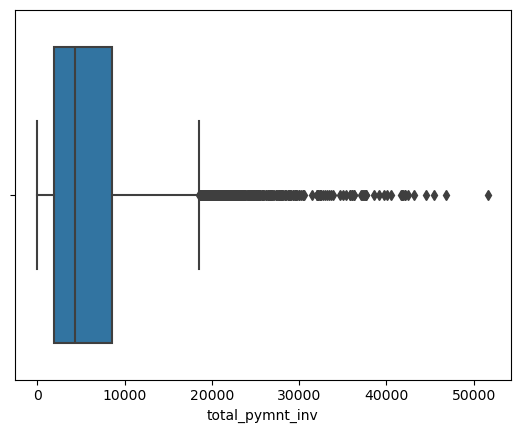

total_rec_prncp
Skew : 2.01


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


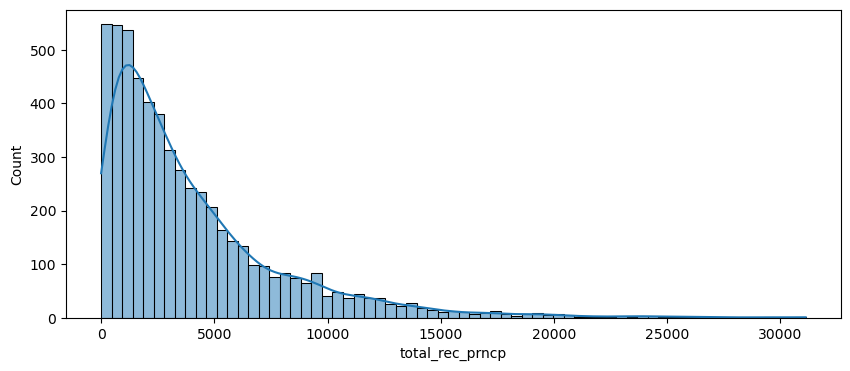

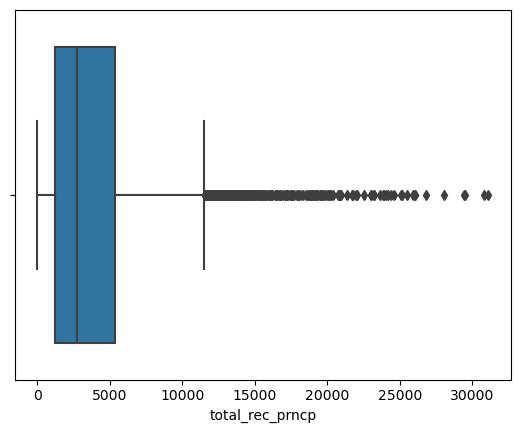

total_rec_int
Skew : 2.5


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


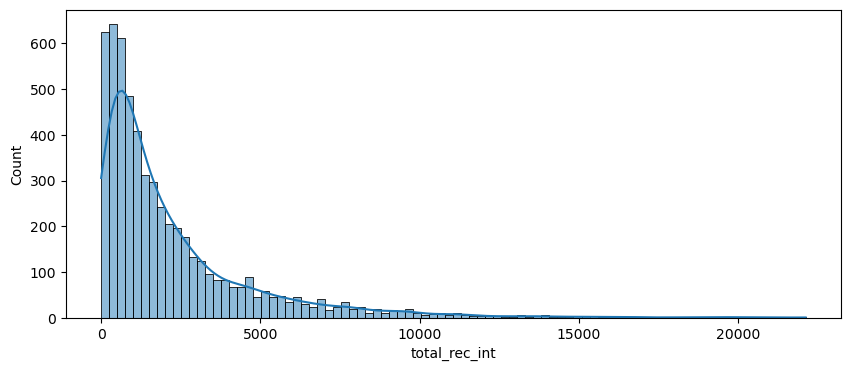

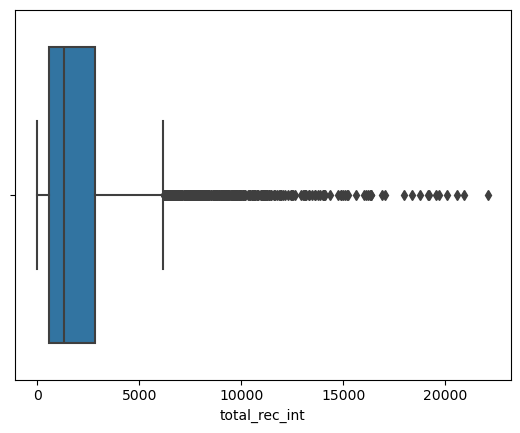

total_rec_late_fee
Skew : 4.65


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


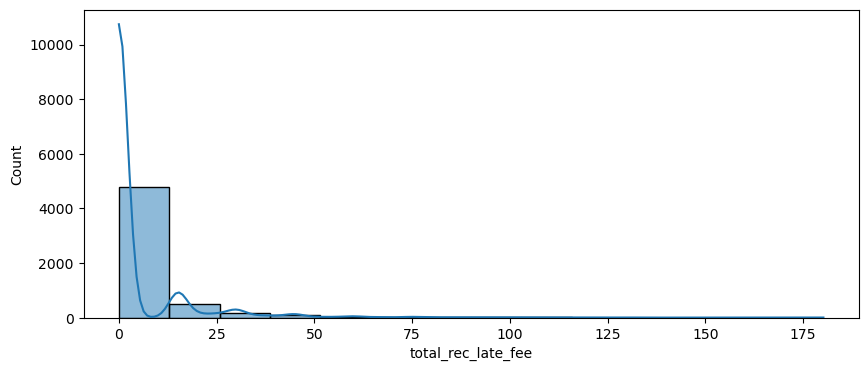

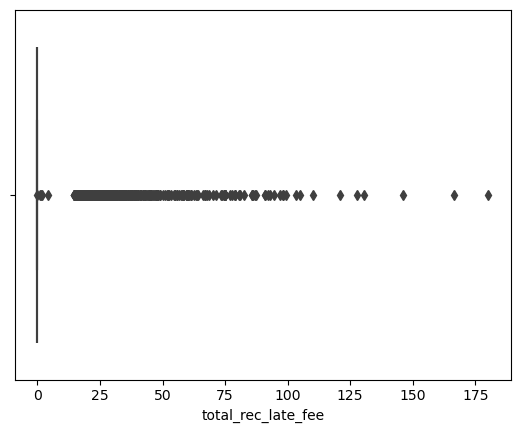

recoveries
Skew : 6.44


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


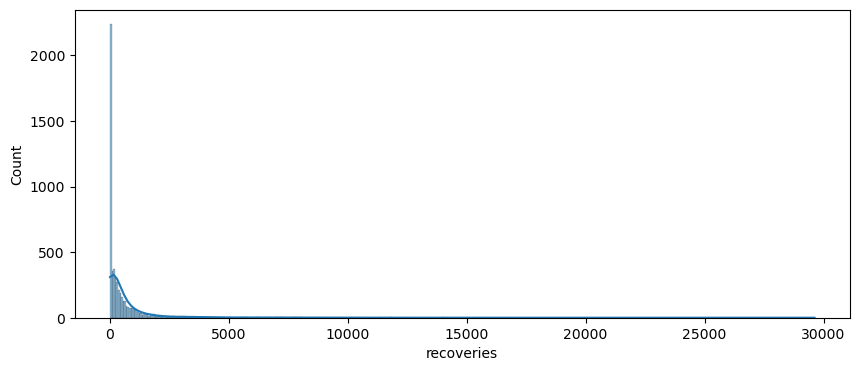

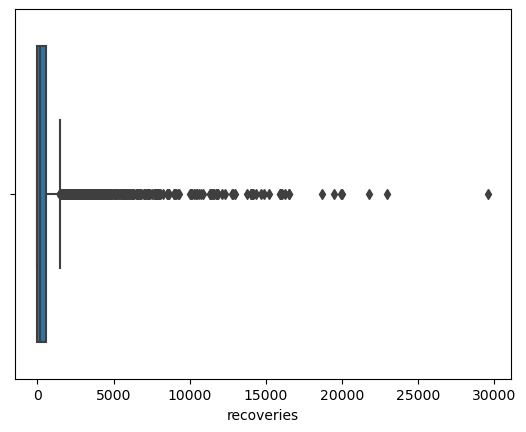

collection_recovery_fee
Skew : 9.46


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


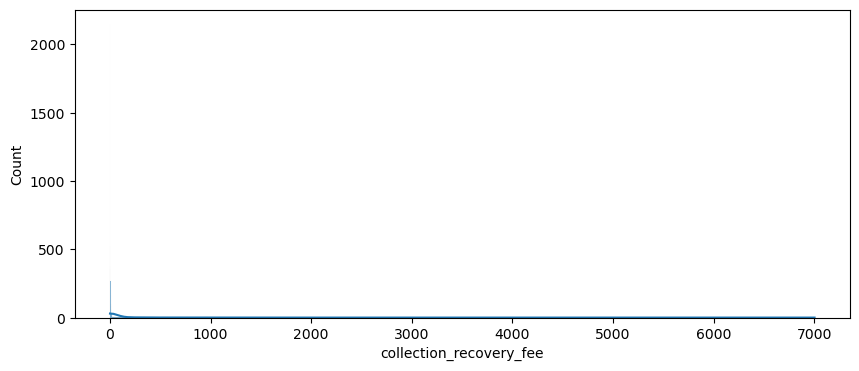

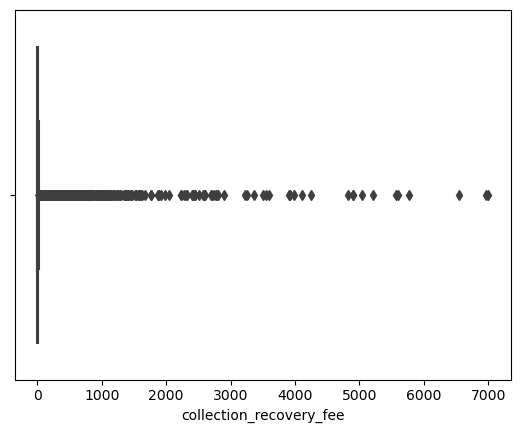

last_pymnt_amnt
Skew : 13.58


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


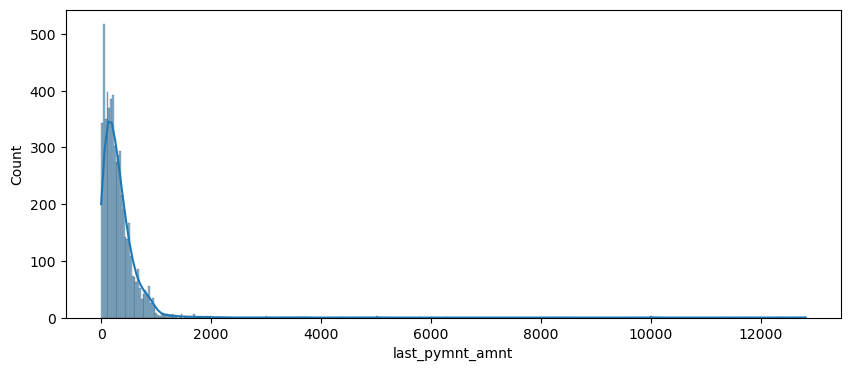

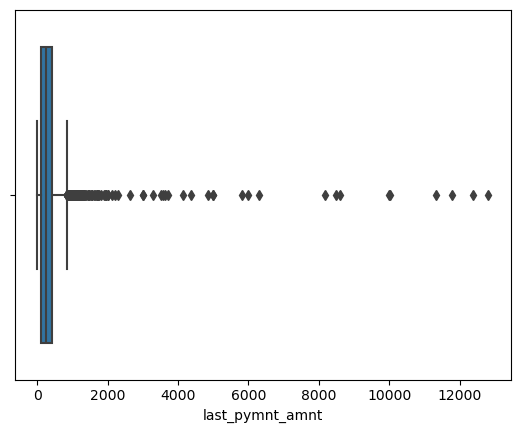

pub_rec_bankruptcies
Skew : 3.57


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


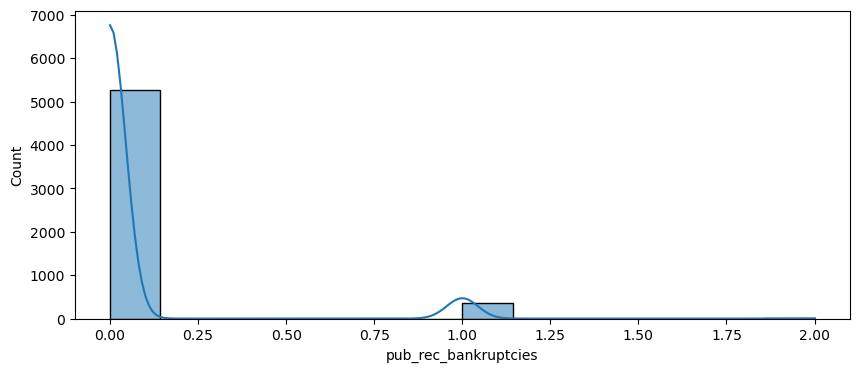

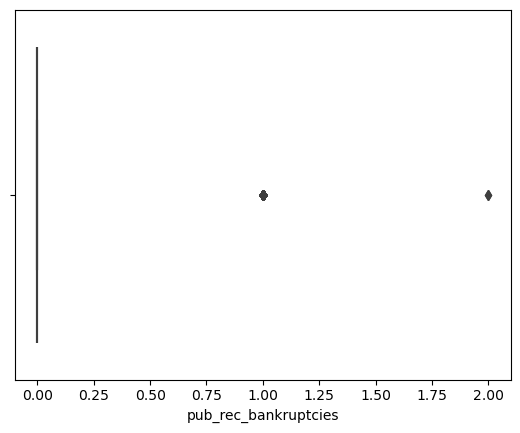

loan_income_ratio
Skew : 0.74


C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


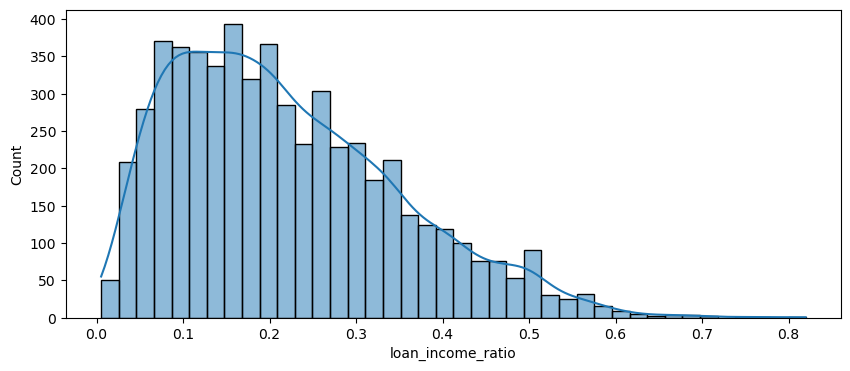

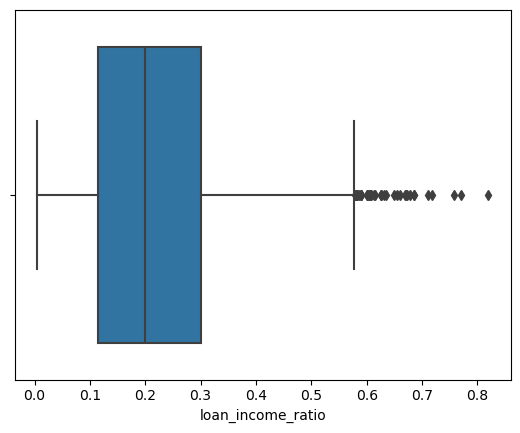

In [30]:
#Analyze individual variables to understand their distribution and identify potential outliers.
#univariate analysis for numerical columns
for col in numrical_cols:
    print(col)
    print('Skew :', round(df[col].skew(),2))
    plt.figure(figsize = (10, 4))
    sns.histplot(df[col], kde=True)
    plt.show()
    #box plot
    sns.boxplot(x=df[col])
    plt.show()



#observation from univariate analysis
The skewness value of a distribution provides information about the asymmetry of the data around its mean.  
1.loan_amnt column:
    i)The loan_amnt column has a skewness of 0.92, indicating a moderate positive skew. This means that the distribution of loan amounts is asymmetrical, with a longer tail extending to the right.
    ii) Most of the default loans lies between Rs5000 to Rs 25000 where higest number of default loans lies between Rs 5000 - Rs 10000.
    iii)The median loan amount is Rs10,000. In a box plot, this would be represented by the line inside the box.
    iv) Most of the outliers in the loan_amnt column are observed between the RS30,000 to Rs35,000 range.
2.funded_amnt and funded_amnt_inv are almost same as loan_amount
3.term is not impacting
4.int_rate column: 
    i)The int_rate column has a skewness of 0.09, indicating a very slight positive skew. This means that the distribution of interest rates is nearly symmetrical.
    ii)Most of the default loans lies between 10 to 17.5 intesrest rate where the higest number of default loans lies between 12.5 to 15 percent interest rate.
    iii)The median intesrest rate is between 12.5 to 15. 
    iv) The outliers in the int_rate column are observed between 22.5 to 25
5.installment column: 
    i) The skewness of installment is 1.02
    ii)Most of the default loans lies between 1- 400 installment.
    iii) The median installment is between 200 - 400 
    iv) All outliers are observed above 800.
6.annual_inc:
    i)Only default loan seems to be present with low income
    ii) Alot of outliers are present
7.dti column:
    i) The dti column has a skewness of -0.17, indicating a very slight negative skew. This means that the distribution of debt-to-income ratios is nearly symmetrical
    ii) Most of the default loans lies between the ratio 5 to 25 where highest default loans lies between 10 - 20.
    iii)Median near to the ratio 15 and no outliers present
8.delinq_2yrs, inq_last_6 mths, pub_rec have no impact
9.open_acc: 
    i)The open_acc column has a skewness of 1.07, indicating a moderate positive skew. This means that the distribution of the number of open credit lines is asymmetrica
    ii)Most of the default loans lies between 5- 15 where highest default loans lies between 5-10
    iii)Median is between 5-10
    1v)All outliers are observed above 20.
10.revol_bal: 
    i)The revol_bal column has a skewness of 2.98, indicating a high positive skew. 
    ii)The box plot is reflecting a median towards the lower end and indicating the presence of high values or outliers.
    iii)This distribution suggests that while most borrowers have manageable revolving balances, a few have very high balances, which could impact their financial stability and default risk.
11.revol_util:
    i)The revol_util column for defaulted loans shows a slight negative skew with a skewness of -0.32, indicating that the distribution is nearly symmetrical
    ii)The histogram is showing a relatively even distribution with a minor concentration towards the lower end.
    iii)The median is near to 60. No outlier present.
    iv)This distribution suggests that even among defaulting borrowers, there is a well-distributed range of revolving utilization rates, with a slight tendency towards lower utilization. This indicates that defaults occur across a broad spectrum of utilization rates, not just among those with high utilization.
12.total_acc:
    i) The total_acc column for defaulted loans shows a moderate positive skew with a skewness of 0.81, indicating that most defaulting borrowers have a lower number of total credit accounts, with a smaller number having many accounts.
    ii)More default account lie between 5 - 40 where highest default account lies between 10-20
    iii)Median near 20 which is at lower end. All outliers above 50.
    iv)This distribution suggests that defaulting borrowers typically have fewer credit accounts, which may contribute to their default risk due to less credit experience or history.
13.out_prncp, out_prncp_inv, total_rec_late_fee, recoveries,collection_recovery_fee, last_pymnt_amnt,pub_rec_bankruptcieshave no impact.
14.total_pymnt:
    i)The total_pymnt column for defaulted loans exhibits a high positive skew, indicating that most defaulting borrowers make lower total payments, with fewer borrowers making higher payments before default.
    ii)The median towards the lower end, with a longer right whisker indicating the presence of higher payment outliers.
    iii)Understanding the distribution characteristics of total_pymnt among defaulted loans provides valuable insights into borrower payment behavior and aids in risk assessment
15.total_pymnt_inv is almost same as total_pymnt.
16.total_rec_prncp and total_rec_int:
    i)The total_rec_prncp and total_rec_int columns for defaulted loans exhibits a high positive skew, indicating that most defaulting borrowers receive lower total principal amounts.
    ii)The histogram illustrates a concentration of values towards the lower end.
    iii)Median towards the lower end with a longer right whisker indicating the presence of higher outliers.
17.loan_income_ratio:
    i)The loan_income_ratio column for defaulted loans exhibits a moderate positive skew, indicating that most defaulting borrowers have lower loan-to-income ratios, but there is still a presence of borrowers with higher ratios.
    ii)The histogram illustrates a concentration of values towards the lower end of the loan-to-income ratio range, with a gradual decline towards higher ratios.
    iii)Median is near 0.2 which is at lower end.

In [30]:
# Convert infinity values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

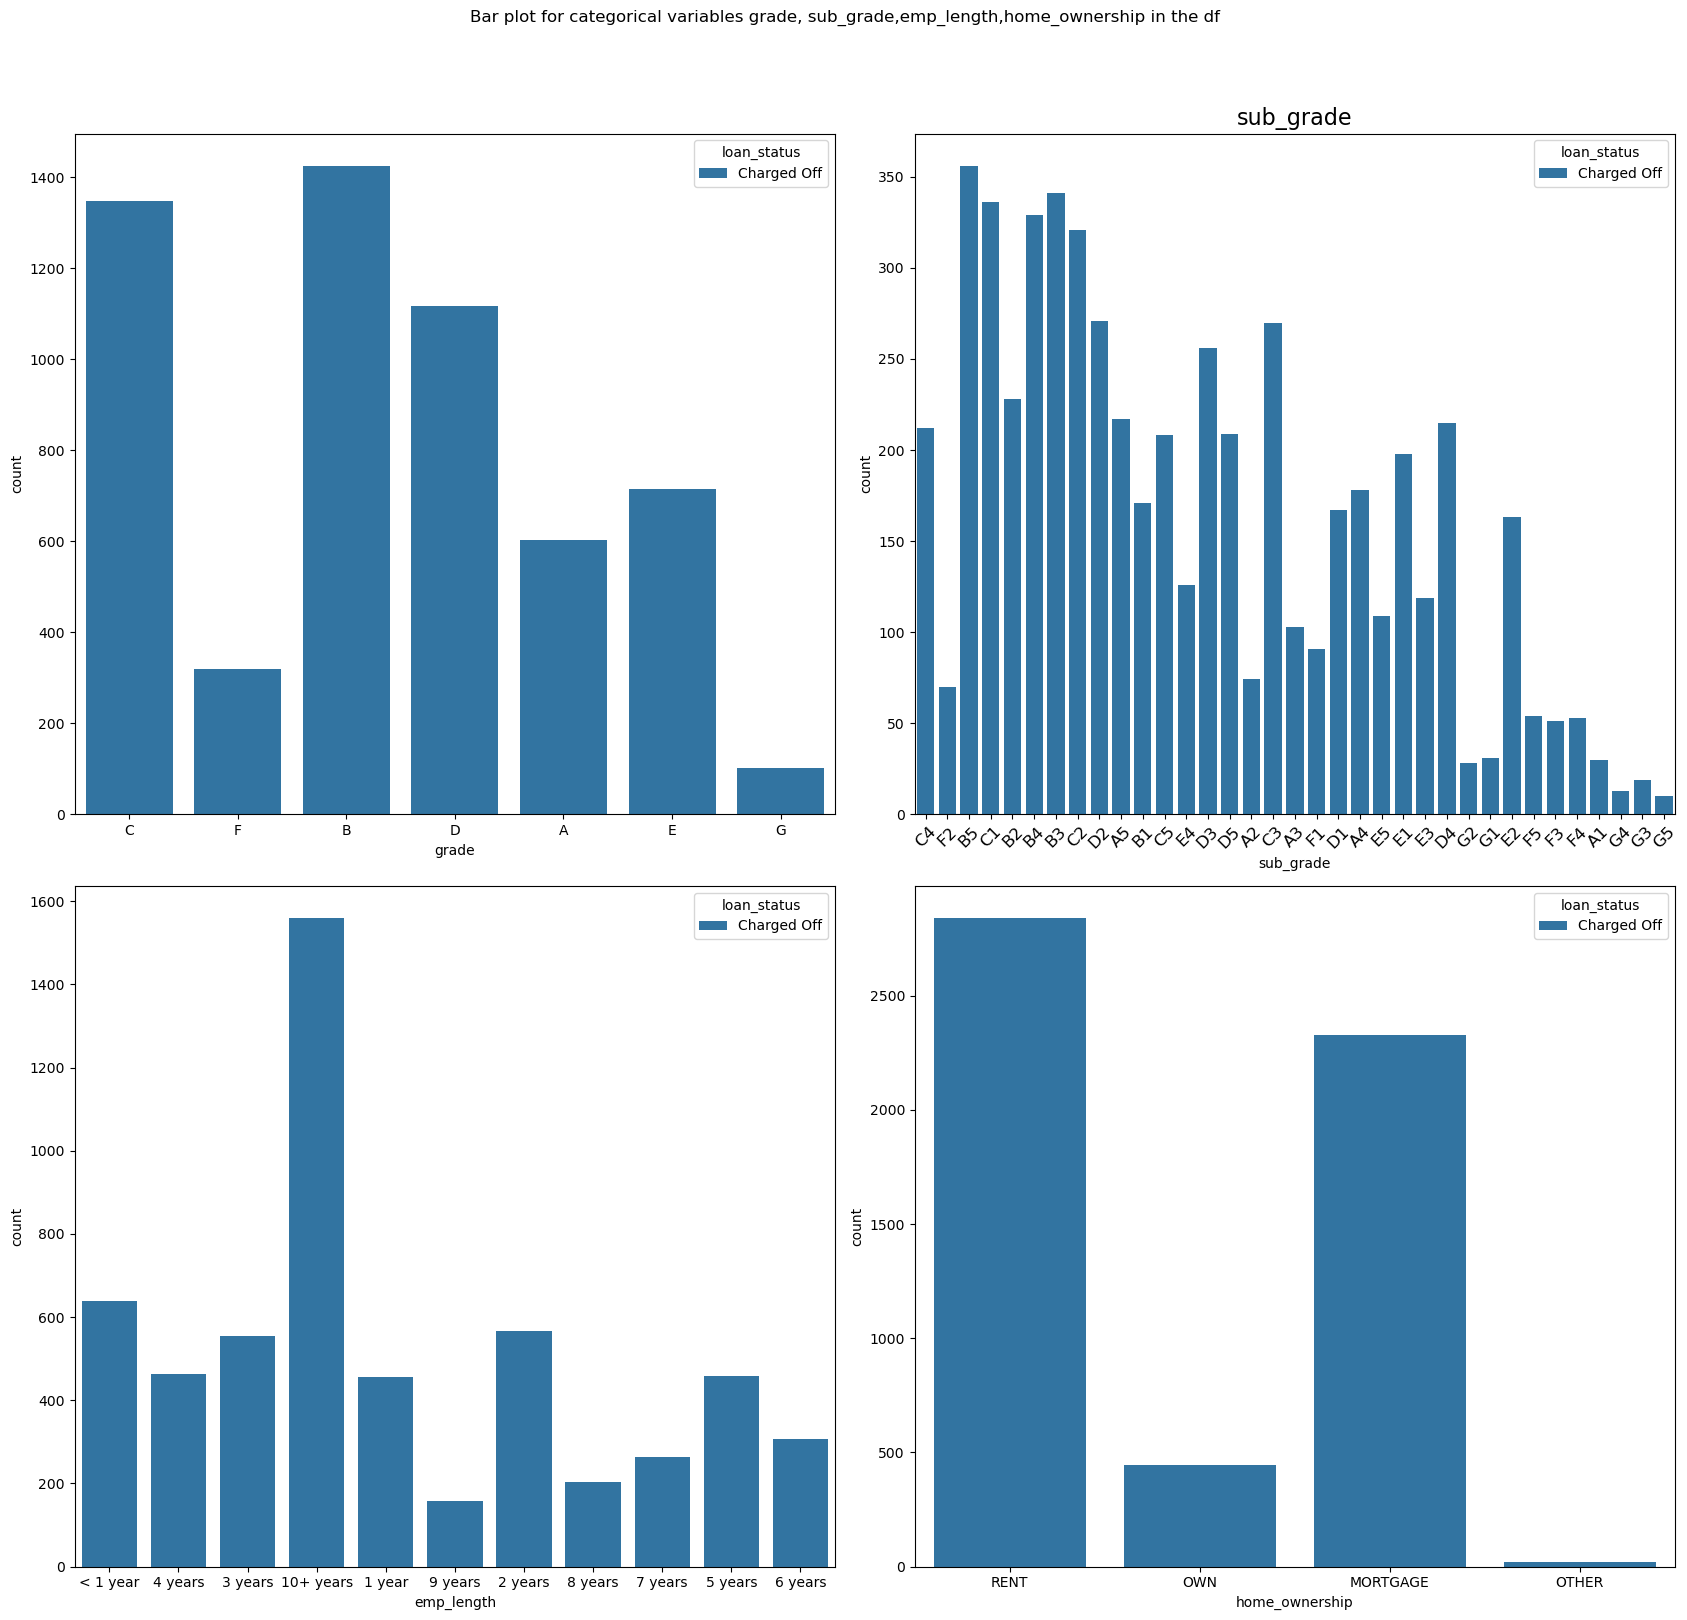

In [31]:
#univariate analysis for categorical columns grade, sub_grade,emp_length,home_ownership
fig, axes = plt.subplots(2, 2, figsize = (17, 17))
fig.suptitle('Bar plot for categorical variables grade, sub_grade,emp_length,home_ownership in the df')
sns.countplot(ax = axes[0, 0], x = 'grade', data = df, hue='loan_status');
sns.countplot(ax = axes[0, 1], x = 'sub_grade', data = df, hue='loan_status');
sns.countplot(ax = axes[1, 0], x = 'emp_length', data = df, hue='loan_status');
sns.countplot(ax = axes[1, 1], x = 'home_ownership', data = df, hue='loan_status');
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x labels for better readability
axes[0, 1].set_title('sub_grade', fontsize=16)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()

#From the above univariate analysis for categorical columns grade, sub_grade,emp_length,home_ownership we can observe the following points,
1.Most of the default loan exist for grade b,c and d where grade b has highest number of default loan.
2.Similarly grade column if we check the sub_grade then the sub_grade for b, c and d has high number of default loan.
3.Highest number of default loan present for 10+ years of emp_length
4.High number of default loan present for the home_ownership type as rent and mortgage where higest number of default loan present for home_ownership type rent. 

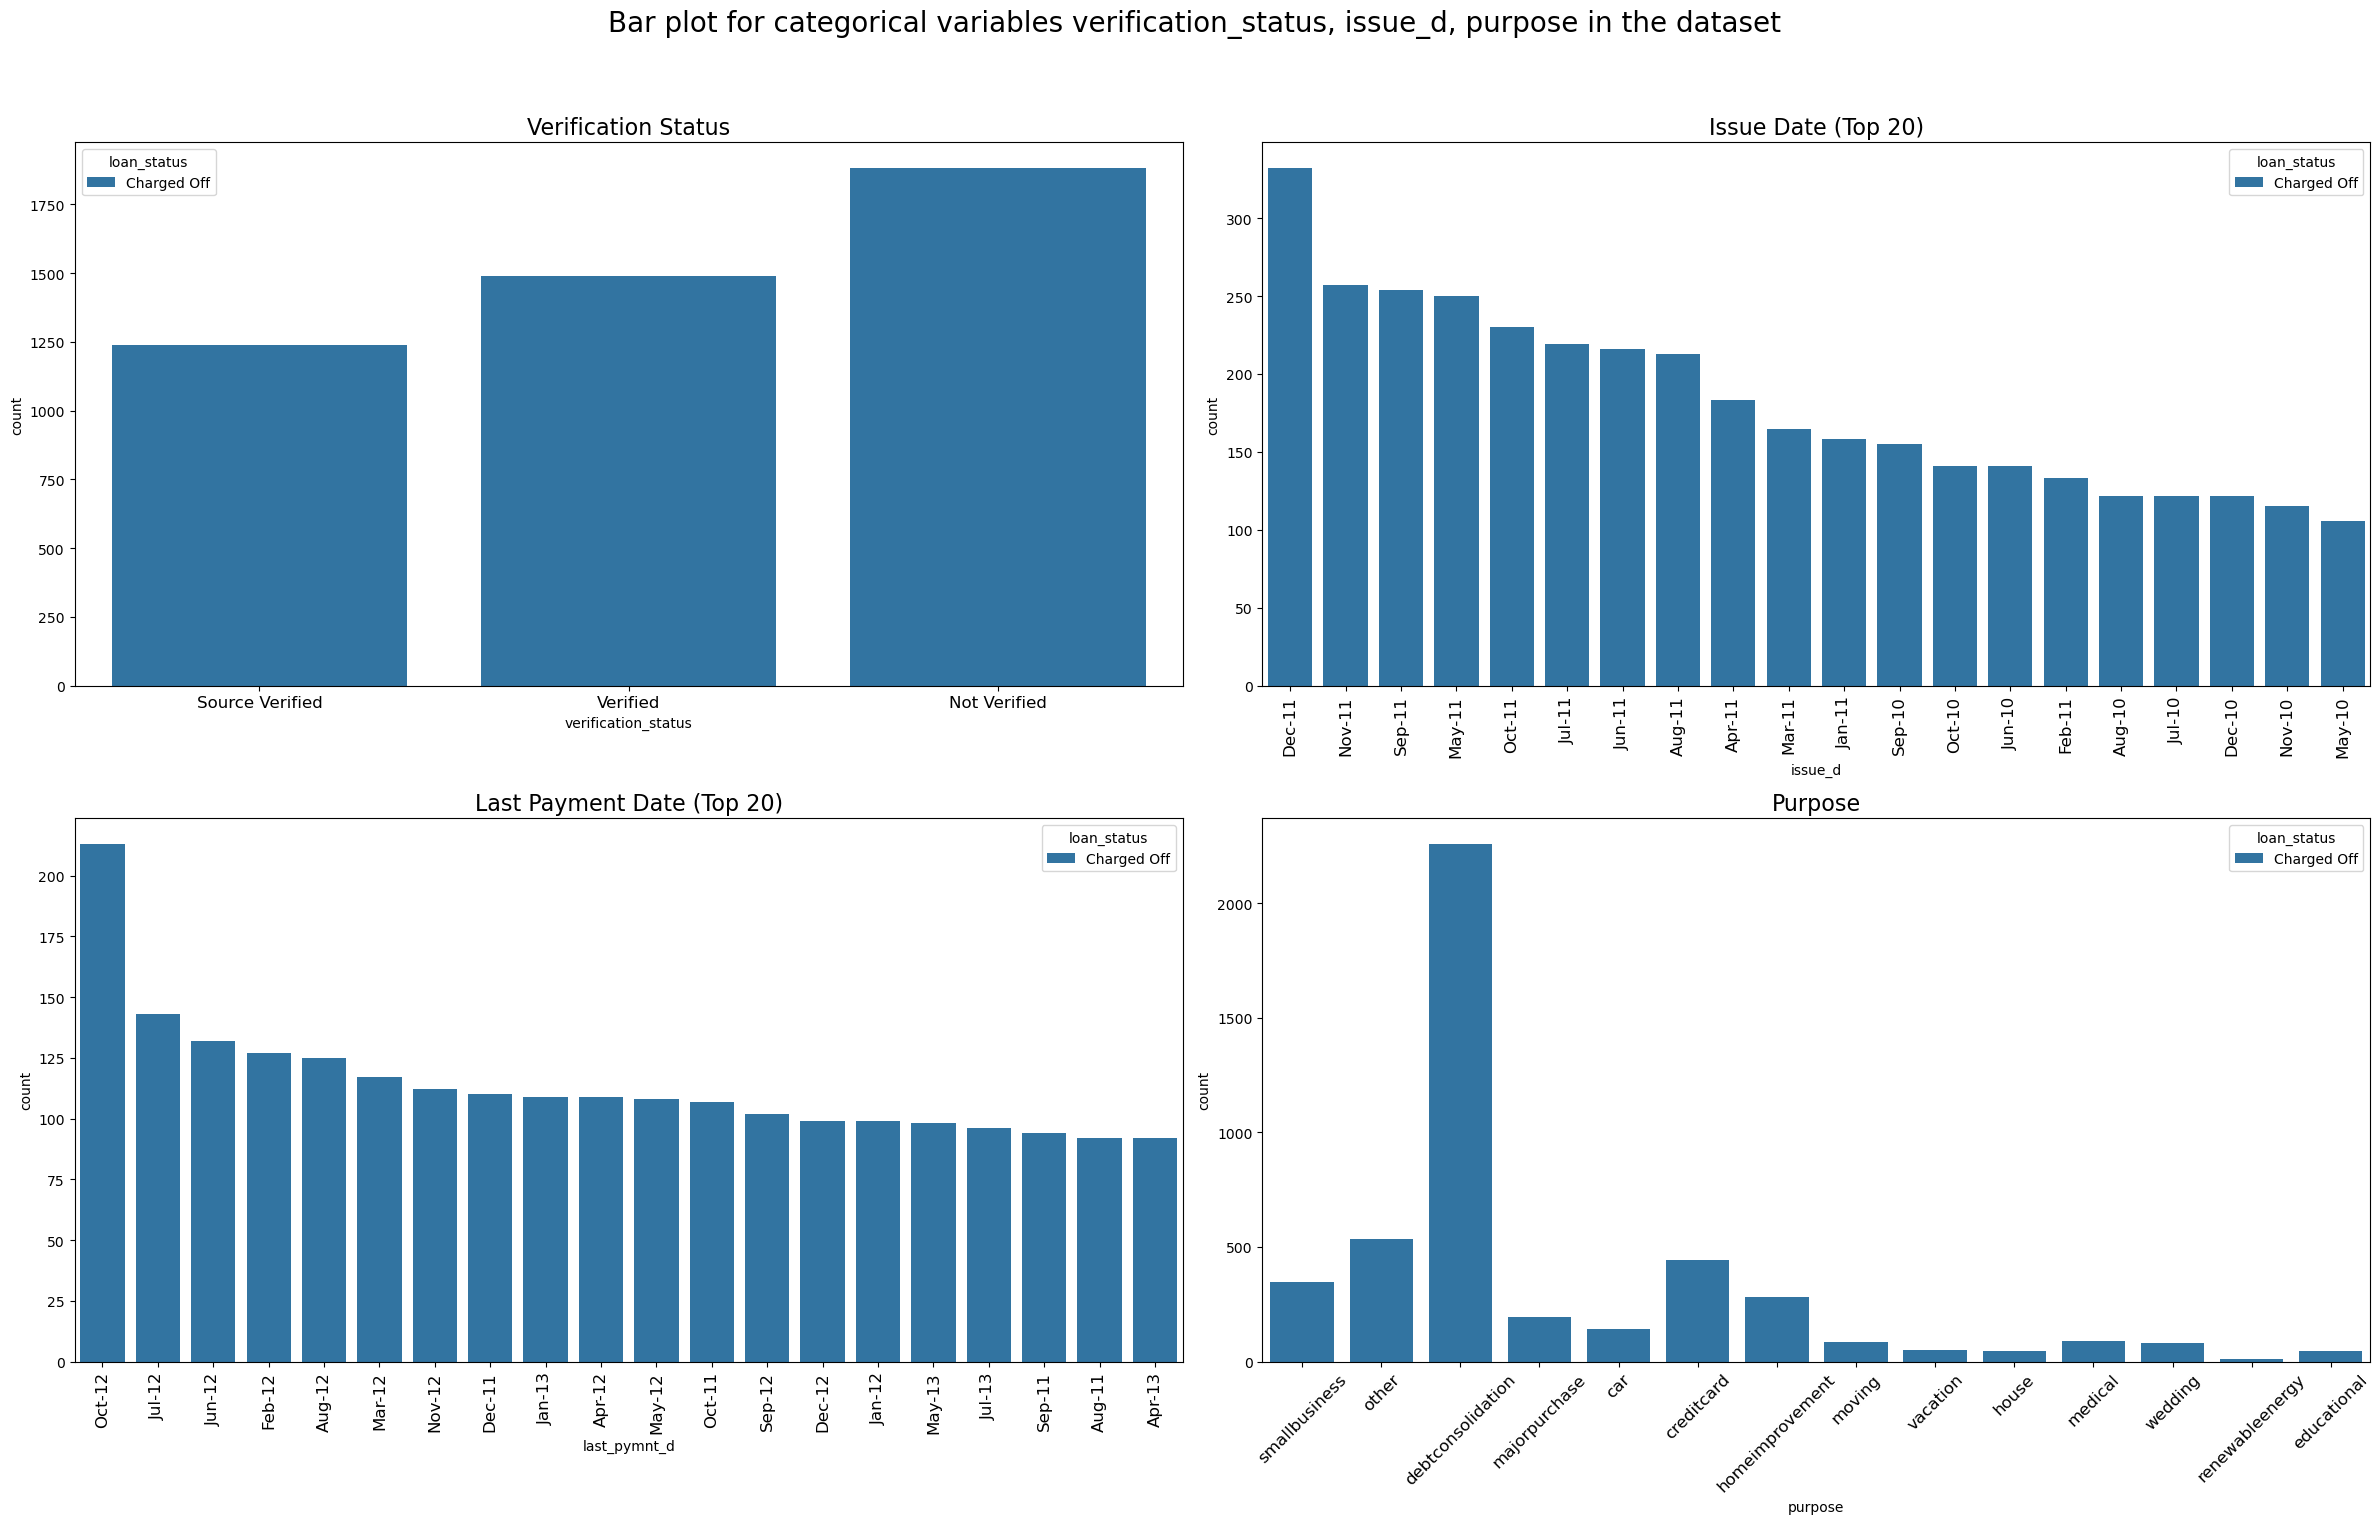

In [42]:
##univariate analysis for categorical columns verification_status, issue_d,last_pymnt_d,purpose
# Adjust figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(24, 16))
fig.suptitle('Bar plot for categorical variables verification_status, issue_d, purpose in the dataset', fontsize=20)

# Plot verification_status
sns.countplot(ax=axes[0, 0], x='verification_status', data=df, hue='loan_status')
axes[0, 0].tick_params(axis='x', rotation=0, labelsize=12)  # Rotate x labels for better readability
axes[0, 0].set_title('Verification Status', fontsize=16)

# Plot issue_d with limited categories
sns.countplot(ax=axes[0, 1], x='issue_d', data=df, hue='loan_status',
              order=df['issue_d'].value_counts().iloc[:20].index)  # Limit to top 20 categories
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x labels for better readability
axes[0, 1].set_title('Issue Date (Top 20)', fontsize=16)

# Plot last_pymnt_d with limited categories
sns.countplot(ax=axes[1, 0], x='last_pymnt_d', data=df, hue='loan_status',
              order=df['last_pymnt_d'].value_counts().iloc[:20].index)  # Limit to top 20 categories
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=12)  # Rotate x labels for better readability
axes[1, 0].set_title('Last Payment Date (Top 20)', fontsize=16)

# Plot purpose
sns.countplot(ax=axes[1, 1], x='purpose', data=df, hue='loan_status')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x labels for better readability
axes[1, 1].set_title('Purpose', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()

#From the above univariate analysis for categorical columns verification_status, issue_d,last_pymnt_d,purpose we can observe the following points, 
1.High number of default loan present for all type of verification_status but verification_status with Not Verified has highest number of default loan. 2.It is seems to be issue_d and last_pymnt_d have not much impact on default loan risk factor.3. The highest number of default loan present for debtconsolidation purpose.

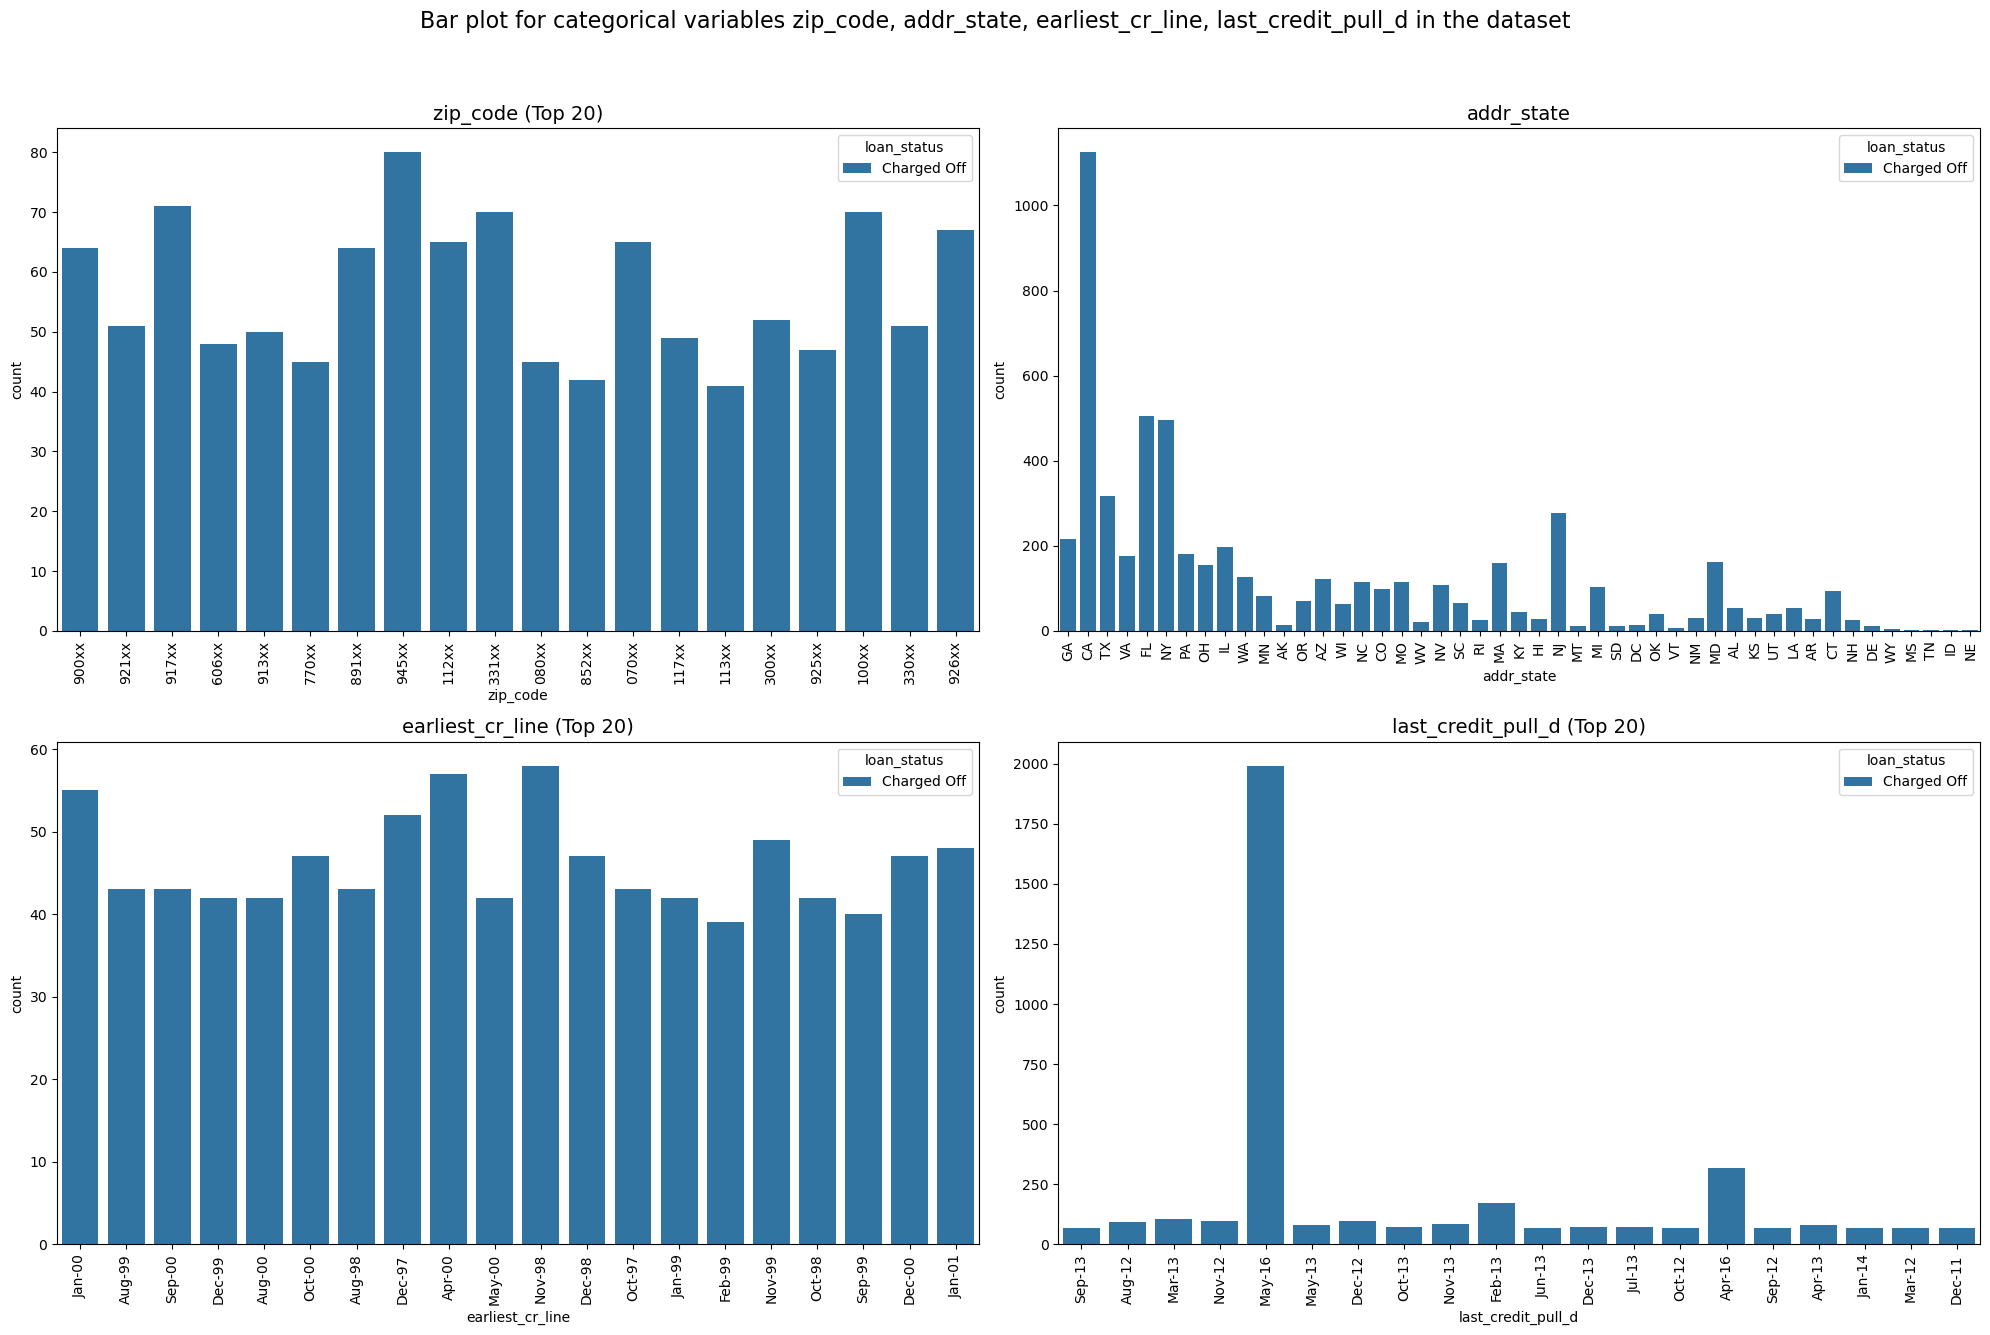

In [33]:
#univariate analysis for categorical columns ip_code, addr_state, earliest_cr_line, last_credit_pull_d
# Adjust figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Bar plot for categorical variables zip_code, addr_state, earliest_cr_line, last_credit_pull_d in the dataset', fontsize=16)

# Function to limit categories
def plot_limited_categories(ax, x, data, hue, limit=20):
    top_categories = data[x].value_counts().nlargest(limit).index
    limited_data = data[data[x].isin(top_categories)]
    sns.countplot(ax=ax, x=x, data=limited_data, hue=hue)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(f'{x} (Top {limit})', fontsize=14)

# Plot zip_code with limited categories
plot_limited_categories(axes[0, 0], 'zip_code', df, 'loan_status', limit=20)

# Plot addr_state with all categories
sns.countplot(ax=axes[0, 1], x='addr_state', data=df, hue='loan_status')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_title('addr_state', fontsize=14)

# Plot earliest_cr_line with limited categories
plot_limited_categories(axes[1, 0], 'earliest_cr_line', df, 'loan_status', limit=20)

# Plot last_credit_pull_d with limited categories
plot_limited_categories(axes[1, 1], 'last_credit_pull_d', df, 'loan_status', limit=20)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()

#From the above univariate analysis for categorical columns zip_code, addr_state, earliest_cr_line, last_credit_pull_d we can observe the following points,
1.zip_code and earliest_cr_line have not much impact on default loan risk.
2.Higest number of default loan is present in the addr_state CA.
3.There are significant default loan present for last_credit_pull_d on May-16

In [34]:
# Get the top 20 most frequent job titles
top_titles = df['emp_title'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 job titles
filtered_df = df[df['emp_title'].isin(top_titles)]

Since emp_title has very large data so we consider 20 most frequent job titles

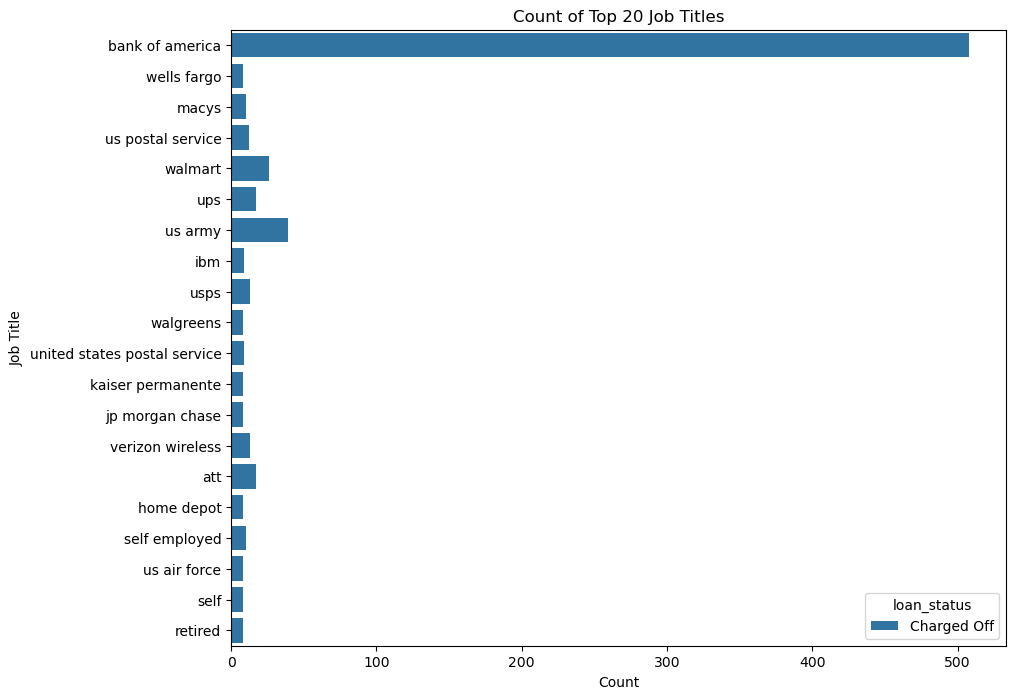

In [35]:
##univariate analysis for categorical columns emp_title
# Plot the count of the top 20 job titles
plt.figure(figsize=(10, 8))
sns.countplot(y=filtered_df['emp_title'], data=df, hue='loan_status')
plt.title('Count of Top 20 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


#From the above univariate analysis for categorical columns emp_title we can observe that emp_title with bank of america has higest number of default loan.

In [36]:
# Select only numeric columns for transformation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply log1p transformation to handle zeros and very small values
for col in numeric_columns:
    df[col] = np.log1p(df[col])

In [37]:
#Standardize the numerical columns to have zero mean and unit variance,
#which can help in visualizing the data better and avoiding scale issues.
# Standardize the numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [38]:
# Define a function to filter outliers
def filter_outliers(df, columns, threshold=0.99):
    for col in columns:
        upper_limit = df[col].quantile(threshold)
        df = df[df[col] <= upper_limit]
    return df

# Filter outliers for numeric columns
df = filter_outliers(df, numeric_columns)

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

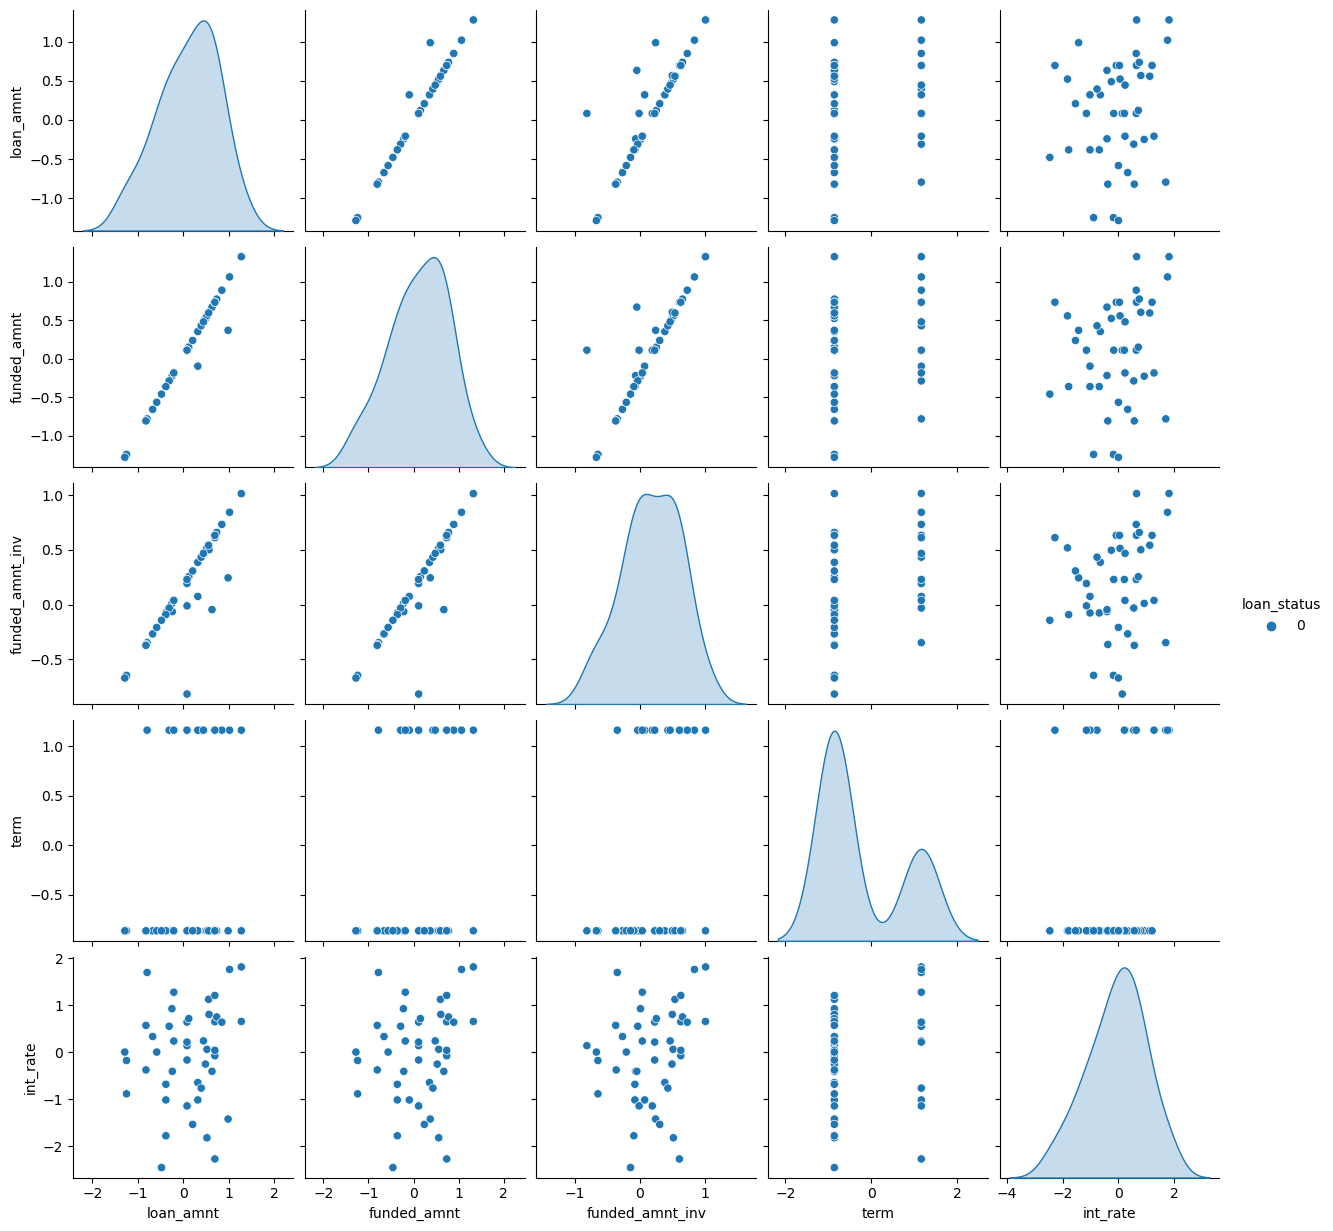

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

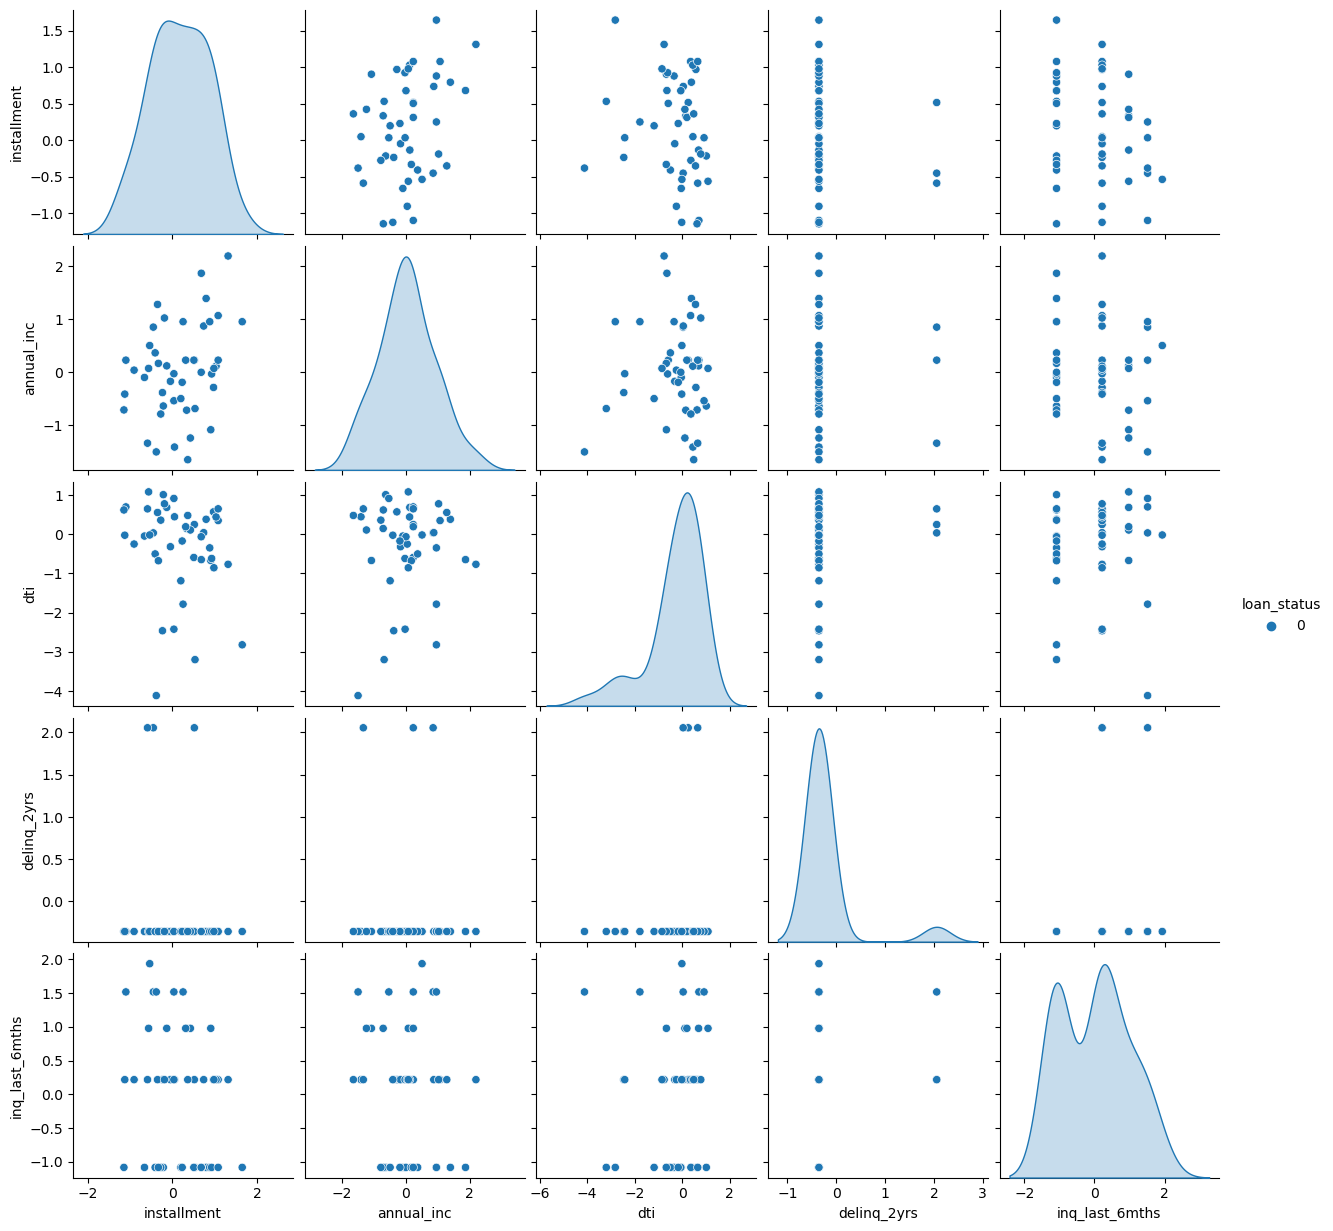

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

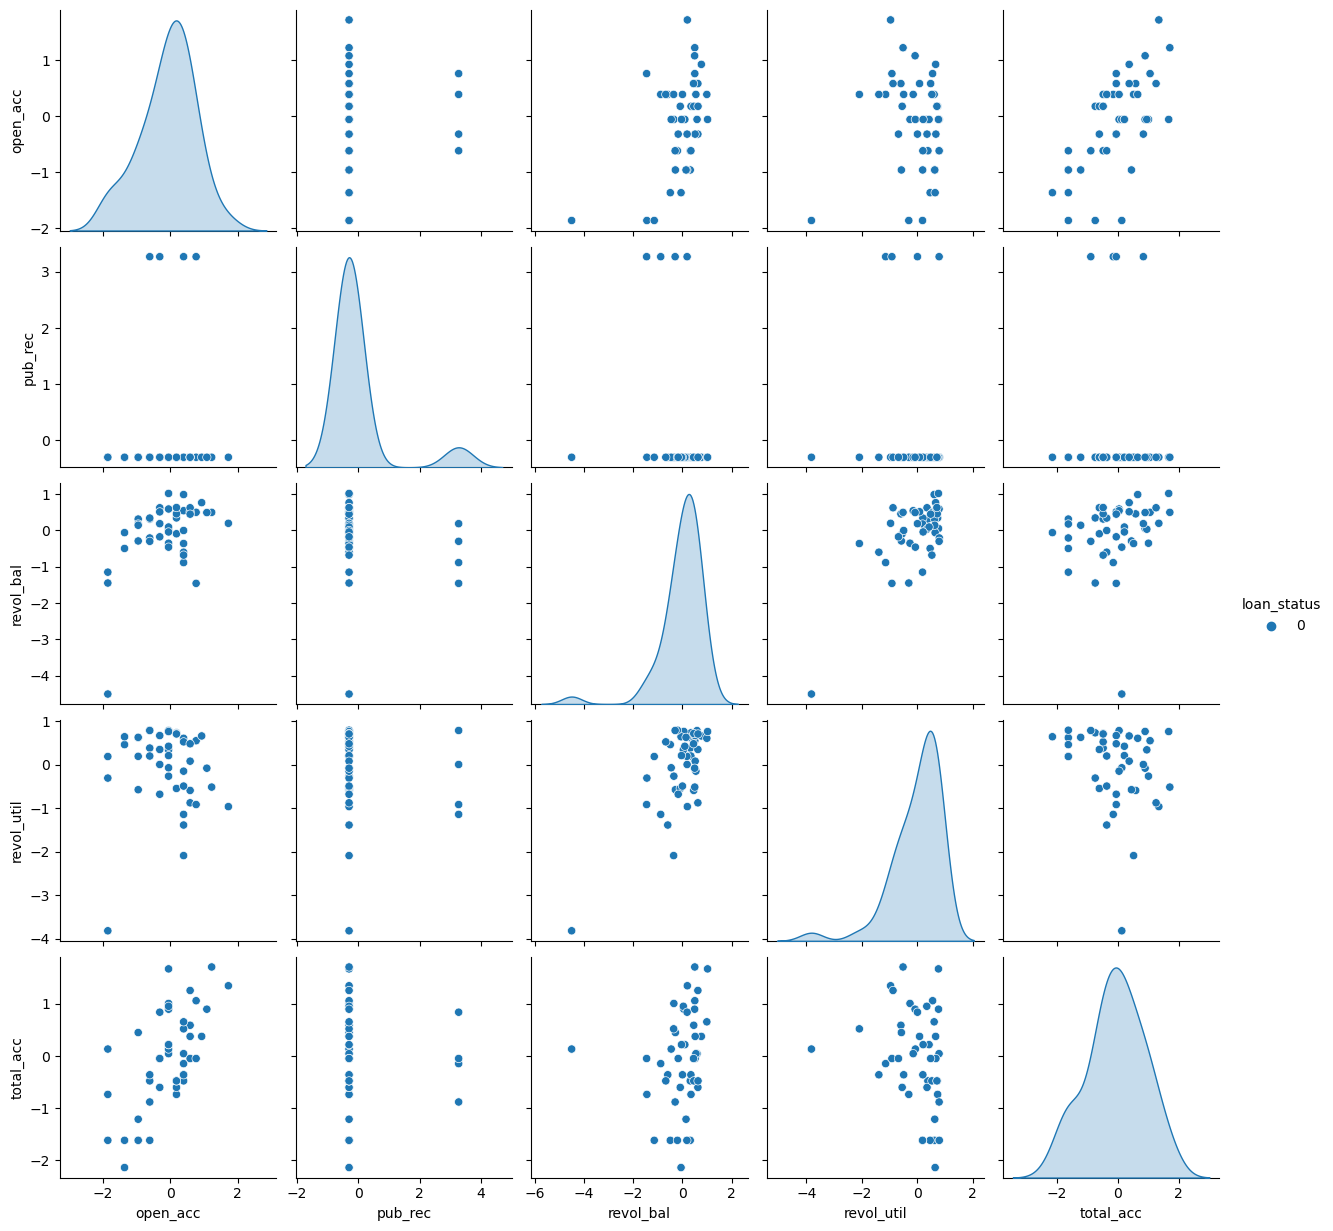

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

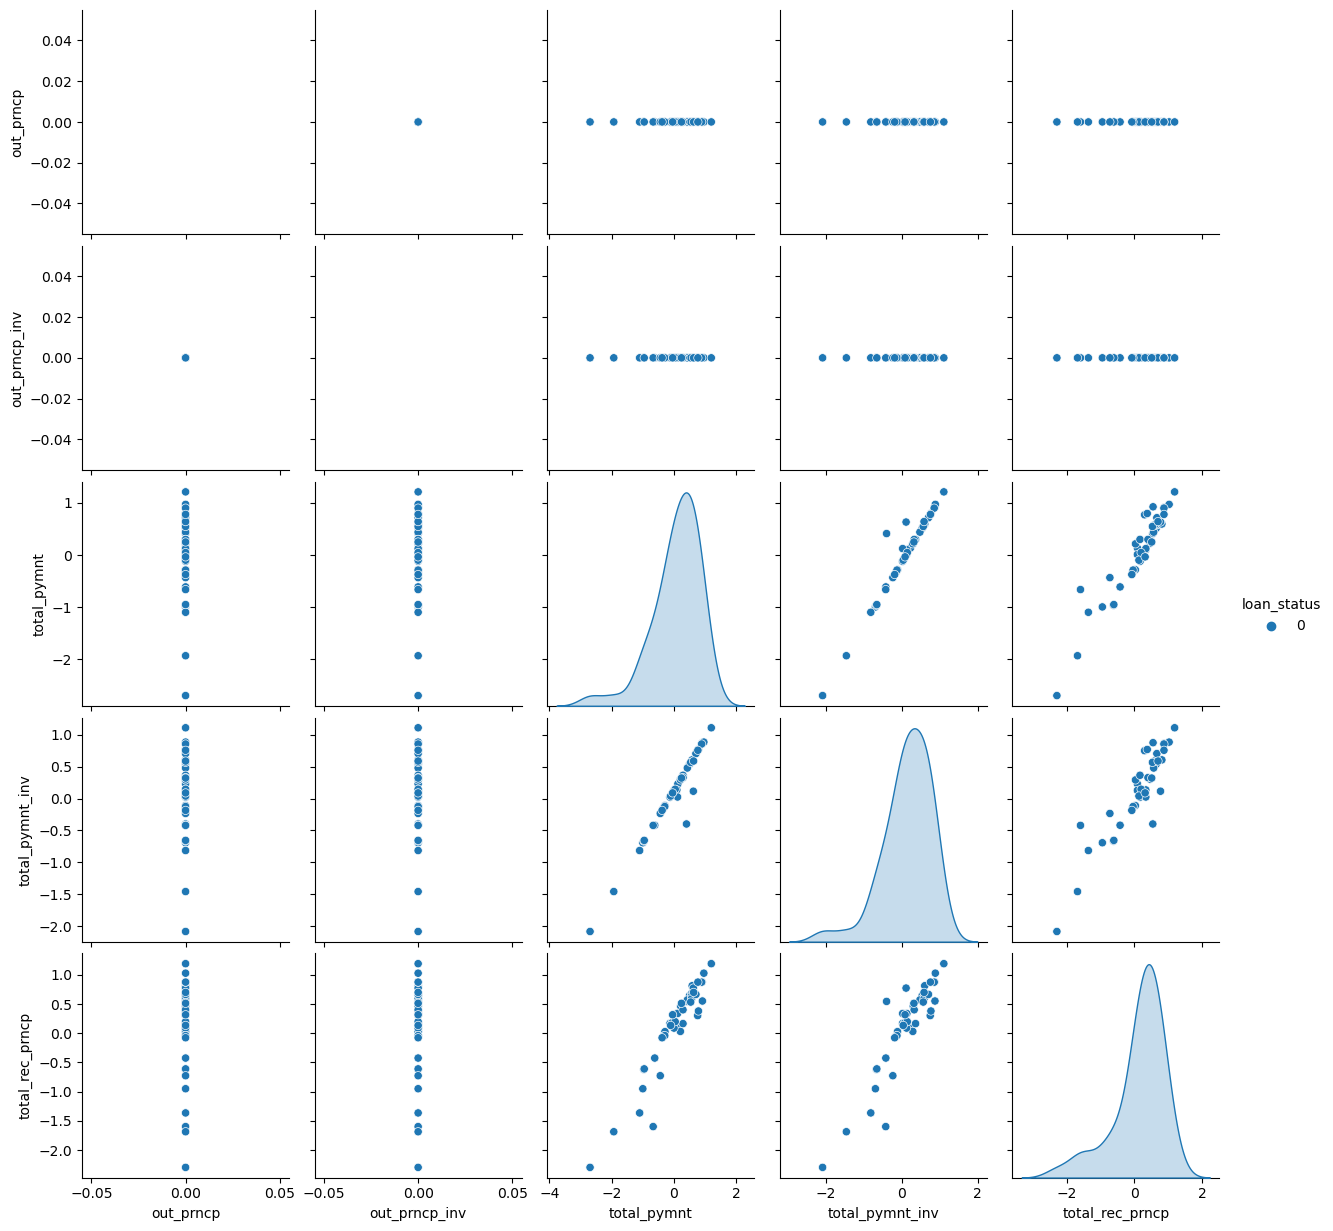

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

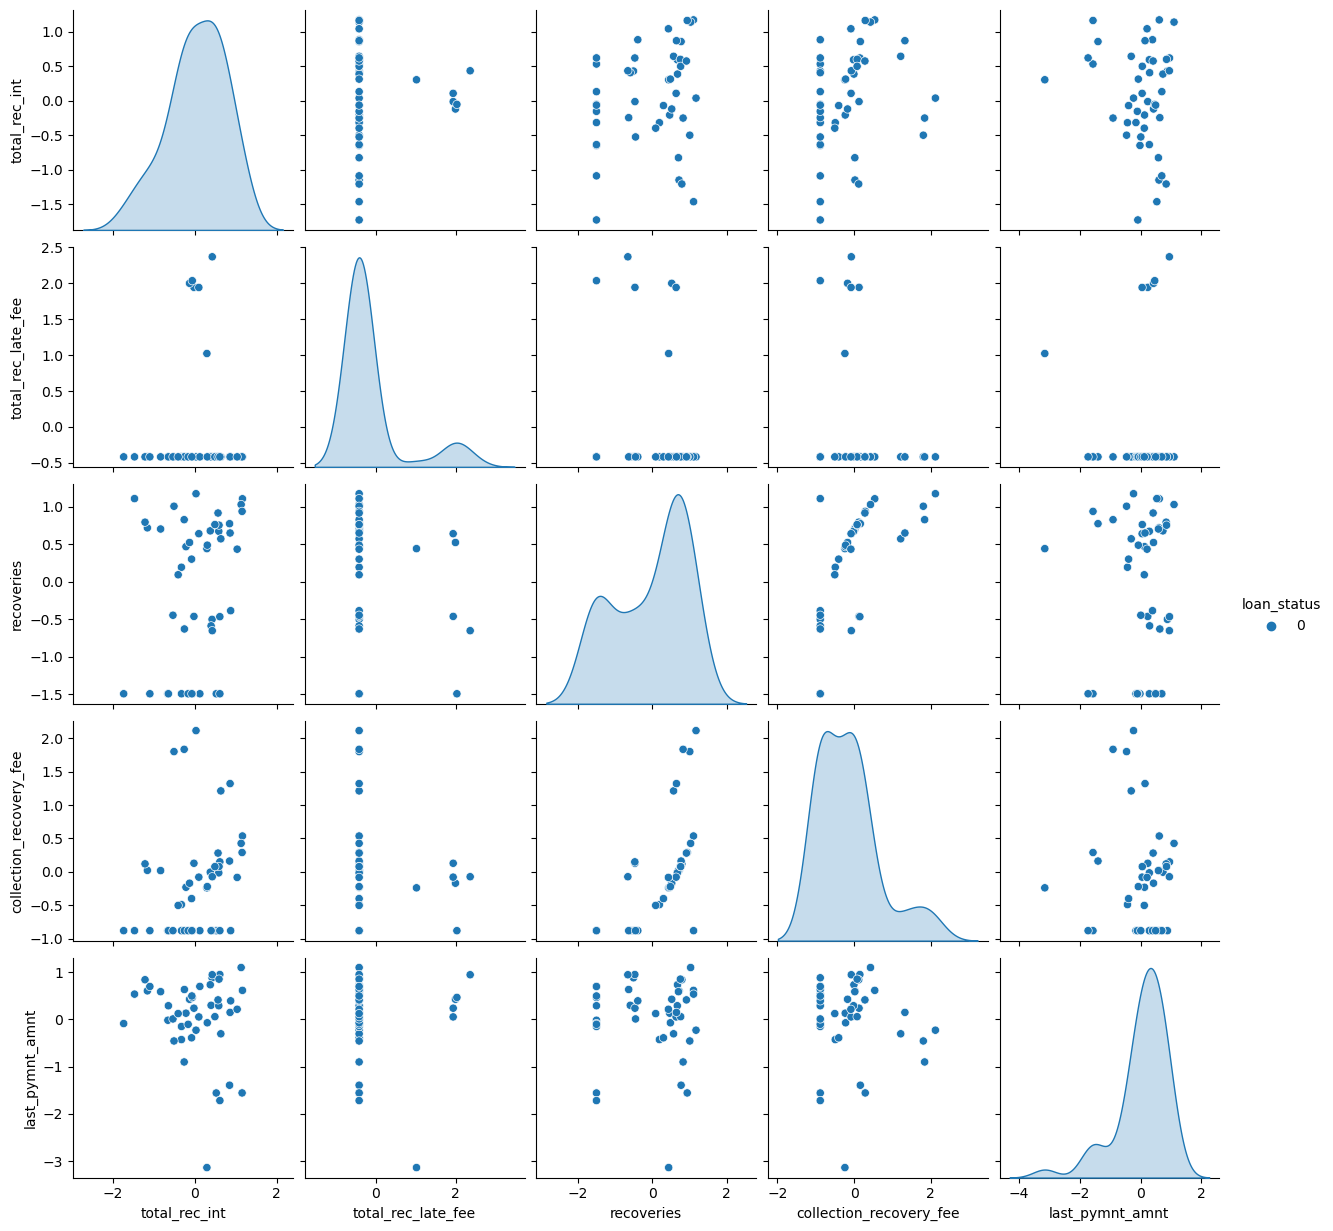

C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


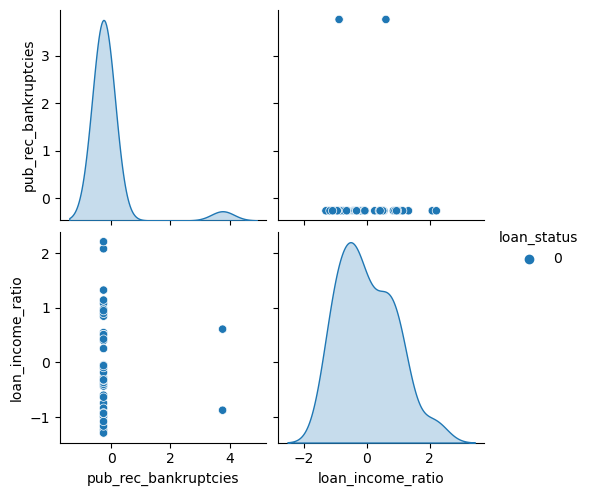

In [39]:
# Sample a small fraction of the dataset
small_sample_df = df.sample(frac=0.01, random_state=42)

# Convert 'loan_status' to numeric
small_sample_df['loan_status'] = small_sample_df['loan_status'].astype('category').cat.codes

# Drop rows with missing values in the selected columns
small_sample_df = small_sample_df.dropna()

# Function to create pairplots in chunks
def create_pairplot(df, columns, hue, chunk_size=5):
    for i in range(0, len(columns), chunk_size):
        sns.pairplot(data=df, hue=hue, vars=columns[i:i+chunk_size])
        plt.show()

# Create pairplots in chunks
create_pairplot(small_sample_df, numeric_columns, 'loan_status')

#Above Pair Plot provides below insights:
1)loan_amnt, funded amnt, and funded_amnt_inv:
There is a positive correlation with default loans, indicating larger loans might be more prone to default.

2)open_accounts and revol_bal:
As the number of open_accounts and the revol_bal increase, so default also increases.

3)open_accounts and revol_util:
Higher open_accounts numbers and higher revol_util ratios correlate with increased default rates.

4)total_rec_int and last_pymnt_amnt:
Higher values might indicate defaults occurring after some time of regular payments.

5)Recoveries and Collection Recovery Fee:
These metrics are positively correlated with default loans.

In [40]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_income_ratio'],
      dtype='object')

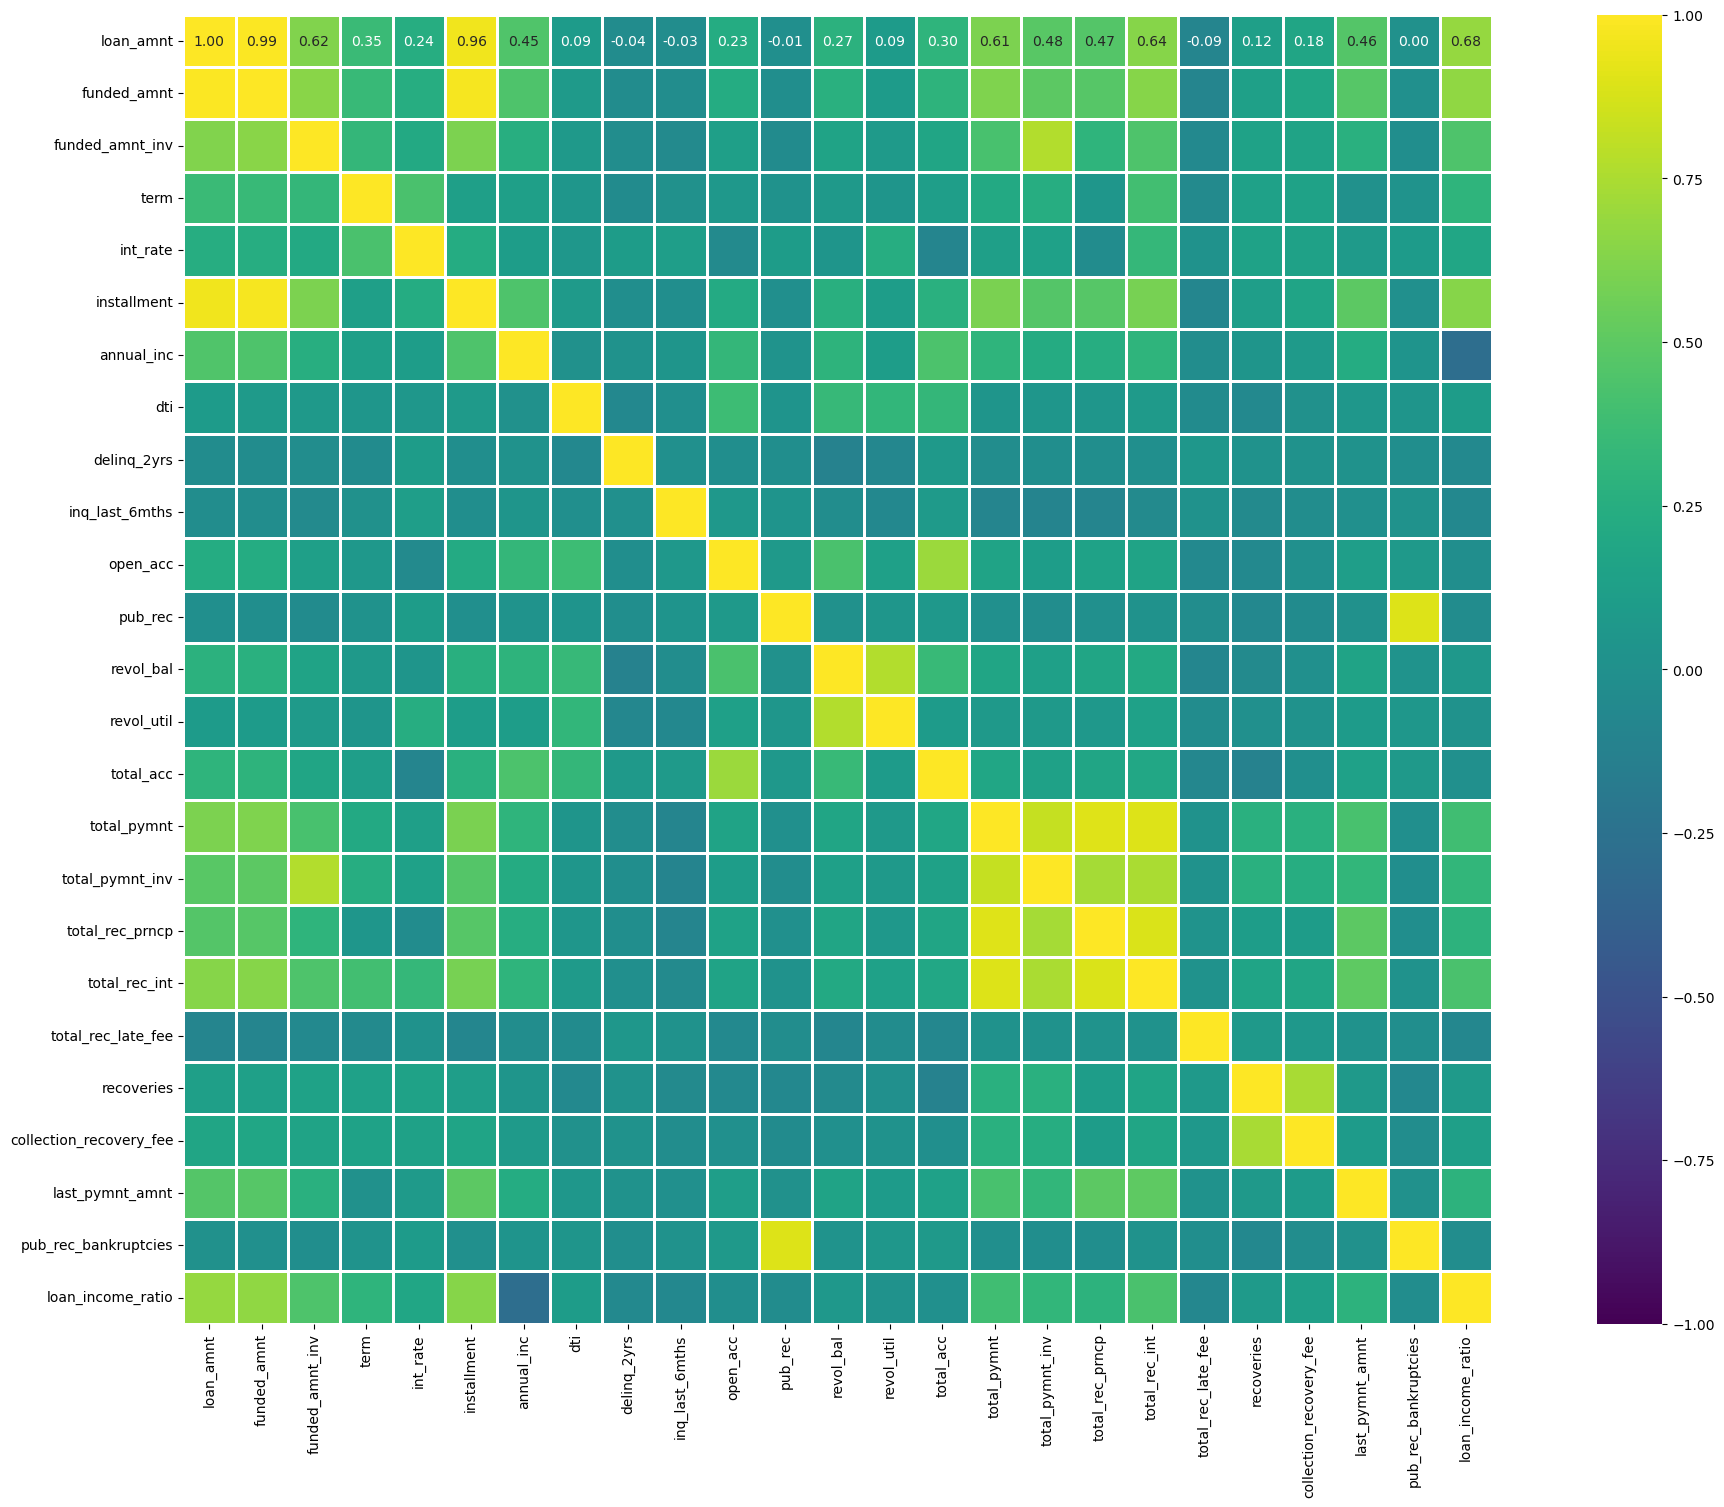

In [41]:
#checking the correlation
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Checking the correlation
correlation_matrix = (numeric_df.drop(['out_prncp','out_prncp_inv'],axis=1).corr())
plt.figure(figsize=(27, 17))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", center=0, vmin=-1, vmax=1, square=True, cmap = "viridis",
            linecolor="White",linewidths=1)
plt.show()

#From the above heat map we can observe the following points,
1)loan_amnt and funded_amnt (0.99): These two variables are almost perfectly correlated
2)total_pymnt and total_pymnt_inv: These variables are also almost perfectly correlated
3)int_rate and installment : These variables has moderate positive correlation
4)loan_amnt, funded_amount and installment: loan_amnt and funded_amount are almost perfectly correlated with installment
5)revol_bal and revol_util : revol_bal and revol_util have a moderate correlation
6)loan_amnt, funded_amount and annual_inc:loan_amnt and funded_amount are almost perfectly correlated with annual_inc
7)annual_inc and dti : These two variables has negative correlation
8)open_acc and pub_rec : These two show no significant correlations 
9)recoveries and collection_recovery_fee: These two variables are almost perfectly correlated
10)total_rec_int and total_pymnt: These two variables are almost perfectly correlated



# Final observation
After doing the EDA on the data set, it indicates that loan defaults are significantly influenced by high loan amounts, high revolving balances, and utilization ratios, along with higher interest rates and installment payments.Borrowers with higher incomes and higher emp_title able to payback the loan better, leading to lower default rates.Also home_ownership and grad are also important factor in loan defaulting.
Defaulting borrowers are leading to higher recovery costs. 